___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to the "***Sentiment Analysis and Classification Project***" project, the first and only project of the ***Natural Language Processing (NLP)*** course.

This analysis will focus on using Natural Language techniques to find broad trends in the written thoughts of the customers. 
The goal in this project is to predict whether customers recommend the product they purchased using the information in their review text.

One of the challenges in this project is to extract useful information from the *Review Text* variable using text mining techniques. The other challenge is that you need to convert text files into numeric feature vectors to run machine learning algorithms.

At the end of this project, you will learn how to build sentiment classification models using Machine Learning algorithms (***Logistic Regression, Naive Bayes, Support Vector Machine, Random Forest*** and ***Ada Boosting***), **Deep Learning algorithms** and **BERT algorithm**.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with the theory behind the algorithms mentioned above as well as NLP techniques.*



---
---


# #Determines
The data is a collection of 22641 Rows and 10 column variables. Each row includes a written comment as well as additional customer information. 
Also each row corresponds to a customer review, and includes the variables:


**Feature Information:**

**Clothing ID:** Integer Categorical variable that refers to the specific piece being reviewed.

**Age:** Positive Integer variable of the reviewers age.

**Title:** String variable for the title of the review.

**Review Text:** String variable for the review body.

**Rating:** Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.

**Recommended IND:** Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.

**Positive Feedback Count:** Positive Integer documenting the number of other customers who found this review positive.

**Division Name:** Categorical name of the product high level division.

**Department Name:** Categorical name of the product department name.

**Class Name:** Categorical name of the product class name.

---

The basic goal in this project is to predict whether customers recommend the product they purchased using the information in their *Review Text*.
Especially, it should be noted that the expectation in this project is to use only the "Review Text" variable and neglect the other ones. 
Of course, if you want, you can work on other variables individually.

Project Structure is separated in five tasks: ***EDA, Feature Selection and Data Cleaning , Text Mining, Word Cloud*** and ***Sentiment Classification with Machine Learning, Deep Learning and BERT model***.

Classically, you can start to know the data after doing the import and load operations. 
You need to do missing value detection for Review Text, which is the only variable you need to care about. You can drop other variables.

You will need to apply ***noise removal*** and ***lexicon normalization*** processes by using the capabilities of the ***nltk*** library to the data set that is ready for text mining.

Afterwards, you will implement ***Word Cloud*** as a visual analysis of word repetition.

Finally, You will build models with five different algorithms and compare their performance. Thus, you will determine the algorithm that makes the most accurate emotion estimation by using the information obtained from the * Review Text * variable.






---
---


# #Tasks

#### 1. Exploratory Data Analysis

- Import Modules, Load Discover the Data

#### 2. Feature Selection and Data Cleaning

- Feature Selection and Rename Column Name
- Missing Value Detection

#### 3. Text Mining

- Tokenization
- Noise Removal
- Lexicon Normalization

#### 4. WordCloud - Repetition of Words

- Detect Reviews
- Collect Words 
- Create Word Cloud 


#### 5. Sentiment Classification with Machine Learning, Deep Learning and BERT Model

- Train - Test Split
- Vectorization
- TF-IDF
- Logistic Regression
- Naive Bayes
- Support Vector Machine
- Random Forest
- AdaBoost
- Deep Learning Model
- BERT Model
- Model Comparison

---
---


# Sentiment analysis of women's clothes reviews


In this project we used sentiment analysis to determined whether the product is recommended or not. We used different machine learning algorithms to get more accurate predictions. The following classification algorithms have been used: ML algorithms(Logistic Regression, Naive Bayes, Support Vector Machine (SVM), Random Forest and Ada Boosting), Deep learning algorithm and BERT algorithm. The dataset comes from Woman Clothing Review that can be find at (https://www.kaggle.com/nicapotato/womens-ecommerce-clothing-reviews. 


## 1. Exploratory Data Analysis

### Import Libraries, Load and Discover the Data

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from scipy import stats
from matplotlib.image import imread
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
import warnings
warnings.filterwarnings("ignore")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('display.max_columns', 50)

from sklearn.model_selection import cross_validate
from sklearn.naive_bayes import MultinomialNB, BernoulliNB # BernoulliNB for binary model


In [7]:
!pip install termcolor
!pip install colorama
import colorama
from colorama import Fore, Style  # maakes strings colored
from termcolor import colored



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Data Wrangling

In [11]:
df0 = pd.read_csv('/content/drive/MyDrive/NLP/Womens Clothing E-Commerce Reviews.csv', index_col=[0])
df = df0.copy()
df.head(5)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [49]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number']>0]
def first_looking(df):
    print(colored("Shape:", attrs=['bold']), df.shape,'\n', 
          colored('-'*79, 'blue', attrs=['bold']),
          colored("\nInfo:\n", attrs=['bold']), sep='')
    print(df.info(), '\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')
    print(colored("Number of Uniques:\n", attrs=['bold']), df.nunique(),'\n',
          colored('-'*79, 'green', attrs=['bold']), sep='')
    print(colored("Missing Values:\n", attrs=['bold']), missing_values(df),'\n', 
          colored('-'*79, 'yellow', attrs=['bold']), sep='')
    print(colored("All Columns:", attrs=['bold']), list(df.columns),'\n', 
          colored('-'*79, 'red', attrs=['bold']), sep='')

    df.columns= df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

    print(colored("Columns after rename:", attrs=['bold']), list(df.columns),'\n',
              colored('-'*79, 'red', attrs=['bold']), sep='')


In [50]:
first_looking(df)

Shape:(22641, 3)
-------------------------------------------------------------------------------
Info:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recommended_ind  22641 non-null  object
 1   review_text      22641 non-null  object
 2   not_recommended  22641 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 530.8+ KB
None
-------------------------------------------------------------------------------
Number of Uniques:
recommended_ind        2
review_text        22634
not_recommended        2
dtype: int64
-------------------------------------------------------------------------------
Missing Values:
Empty DataFrame
Columns: [Missing_Number, Missing_Percent]
Index: []
-------------------------------------------------------------------------------
All Columns:['recommended_ind', 'review_text', 'not_recommended']
--------

In [51]:
df.duplicated().sum()

7

In [52]:
df.shape

(22641, 3)

In [53]:
df.drop_duplicates(inplace = True)

In [54]:
df.shape

(22634, 3)

In [55]:
df.isnull().sum()

recommended_ind    0
review_text        0
not_recommended    0
dtype: int64

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22634 entries, 0 to 22640
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recommended_ind  22634 non-null  object
 1   review_text      22634 non-null  object
 2   not_recommended  22634 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 707.3+ KB


In [57]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
not_recommended,22634.0,0.181143,0.385145,0.0,0.0,0.0,0.0,1.0


#### Check Proportion of Target Class Variable:

The target class variable is imbalanced, where "Recommended" values are more dominating then "Not Recommendation".

In [58]:
df["recommended_ind"].value_counts()

1    18534
0     4100
Name: recommended_ind, dtype: int64

## 2. Feature Selection and Data Cleaning

From now on, the DataFrame you will work with should contain two columns: **"Review Text"** and **"Recommended IND"**. You can do the missing value detection operations from now on. You can also rename the column names if you want.



### Feature Selection and Rename Column Name

In [59]:
df = df[['recommended_ind','review_text']]
df

,recommended_ind,review_text
0,1,Absolutely wonderful - silky and sexy and comf...
1,1,Love this dress! it's sooo pretty. i happene...
2,0,I had such high hopes for this dress and reall...
3,1,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,This shirt is very flattering to all due to th...
...,...,...
22636,1,I was very happy to snag this dress at such a ...
22637,1,"It reminds me of maternity clothes. soft, stre..."
22638,0,"This fit well, but the top was very see throug..."
22639,1,I bought this dress for a wedding i have this ...


### Missing Value Detection

In [60]:
df.isnull().sum()

recommended_ind    0
review_text        0
dtype: int64

In [61]:
df.dropna(inplace=True)

In [62]:
df.shape

(22634, 2)

In [63]:
df.isnull().sum()

recommended_ind    0
review_text        0
dtype: int64

In [64]:
df = pd.DataFrame(df0[["Recommended IND", "Review Text"]].values, columns=['recommended_ind', 'review_text'])
df['not_recommended'] = df['recommended_ind'].map({0 : 1, 1: 0})
df = df.dropna().reset_index(drop=True)
df

,recommended_ind,review_text,not_recommended
0,1,Absolutely wonderful - silky and sexy and comf...,0
1,1,Love this dress! it's sooo pretty. i happene...,0
2,0,I had such high hopes for this dress and reall...,1
3,1,"I love, love, love this jumpsuit. it's fun, fl...",0
4,1,This shirt is very flattering to all due to th...,0
...,...,...,...
22636,1,I was very happy to snag this dress at such a ...,0
22637,1,"It reminds me of maternity clothes. soft, stre...",0
22638,0,"This fit well, but the top was very see throug...",1
22639,1,I bought this dress for a wedding i have this ...,0


In [65]:
#!pip install matplotlib -Uq

Text(0.5, 0, 'Recommended IND')

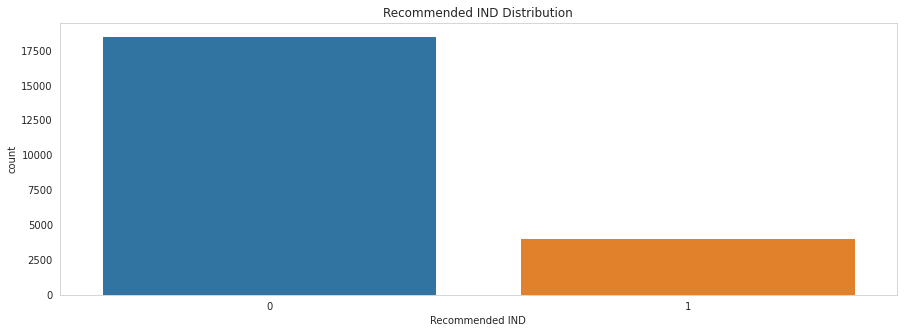

In [66]:
plt.figure(figsize=(15,5))
ax = sns.countplot(x ='not_recommended', data = df)
plt.title('Recommended IND Distribution')
plt.xlabel('Recommended IND')

(-1.25, 1.25, -1.25, 1.25)

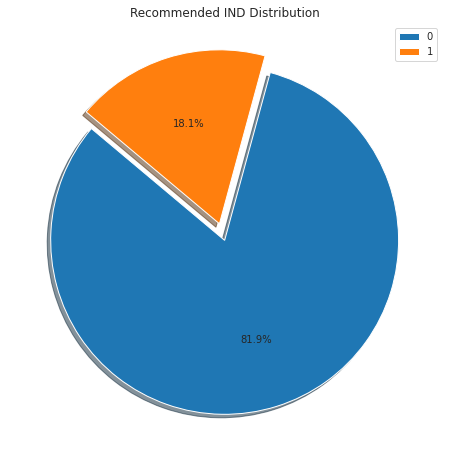

In [67]:
plt.figure(figsize=(8,8))

explode = [0, 0.1]
plt.pie(df['recommended_ind'].value_counts(), explode=explode, autopct='%1.1f%%', shadow=True,startangle=140)
plt.legend(labels=['0','1'])
plt.title('Recommended IND Distribution')
plt.axis('off')

## 3. Text Mining

Text is the most unstructured form of all the available data, therefore various types of noise are present in it. This means that the data is not readily analyzable without any pre-processing. The entire process of cleaning and standardization of text, making it noise-free and ready for analysis is known as **text preprocessing**.

The three key steps of text preprocessing:

- **Tokenization:**
This step is one of the top priorities when it comes to working on text mining. Tokenization is essentially splitting a phrase, sentence, paragraph, or an entire text document into smaller units, such as individual words or terms. Each of these smaller units are called tokens.

- **Noise Removal:**
Any piece of text which is not relevant to the context of the data and the end-output can be specified as the noise.
For example – language stopwords (commonly used words of a language – is, am, the, of, in etc), URLs or links, upper and lower case differentiation, punctuations and industry specific words. This step deals with removal of all types of noisy entities present in the text.


- **Lexicon Normalization:**
Another type of textual noise is about the multiple representations exhibited by single word.
For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”. Though they mean different things, contextually they all are similar. This step converts all the disparities of a word into their normalized form (also known as lemma). 
There are two methods of lexicon normalisation; **[Stemming or Lemmatization](https://www.guru99.com/stemming-lemmatization-python-nltk.html)**. Lemmatization is recommended for this case, because Lemmatization as this will return the root form of each word (rather than just stripping suffixes, which is stemming).

As the first step change text to tokens and convertion all of the words to lower case.  Next remove punctuation, bad characters, numbers and stop words. The second step is aimed to normalization them throught the Lemmatization method. 


***Note:*** *Use the functions of the ***[nltk Library](https://www.guru99.com/nltk-tutorial.html)*** for all the above operations.*



### Tokenization, Noise Removal, Lexicon Normalization

In [68]:
np.unique([word for word in ' '.join(df['review_text'].values) if not word.isalpha()])

array(['\n', '\r', ' ', '!', '"', '#', '$', '%', '&', "'", '(', ')', '*',
       '+', ',', '-', '.', '/', '0', '1', '2', '3', '4', '5', '6', '7',
       '8', '9', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '_',
       '`', '{', '~', '\xa0', '¨', '©', '¼'], dtype='<U1')

In [69]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [70]:
stop_words = stopwords.words('english')
for i in ["not", "no"]:
    stop_words.remove(i)

In [71]:
def cleaning_fsa(data):
    
    import re
    #1. Remove Puncs
    # \w typically matches [A-Za-z0-9_]
    text = re.sub('[^\w\s]','', data)
         
    #2. Tokenize
    text_tokens = word_tokenize(text.lower()) 
    
    #3. Remove numbers
    tokens_without_punc = [w for w in text_tokens if w.isalpha()]
    
    #4. Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    #5. lemma
    text_cleaned = [WordNetLemmatizer().lemmatize(t) for t in tokens_without_sw]
    
    #joining
    return " ".join(text_cleaned)

In [72]:
text = cleaning_fsa(str(df["review_text"]))
text

'absolutely wonderful silky sexy comf love dress sooo pretty happene high hope dress reall love love love jumpsuit fun fl shirt flattering due th happy snag dress reminds maternity clothes soft stre fit well top see throug bought dress wedding dress lovely platinum feminine name length dtype object'

In [73]:
df["review_text"] = df["review_text"].apply(cleaning_fsa)
df["review_text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review_text, dtype: object

In [74]:
df.head(5)

,recommended_ind,review_text,not_recommended
0,1,absolutely wonderful silky sexy comfortable,0
1,1,love dress sooo pretty happened find store im ...,0
2,0,high hope dress really wanted work initially o...,1
3,1,love love love jumpsuit fun flirty fabulous ev...,0
4,1,shirt flattering due adjustable front tie perf...,0


In [75]:
" ".join(df["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'outrageously',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'c

## 4. WordCloud - Repetition of Words

Now you'll create a Word Clouds for reviews, representing most common words in each target class.

Word Cloud is a data visualization technique used for representing text data in which the size of each word indicates its frequency or importance. Significant textual data points can be highlighted using a word cloud.

You are expected to create separate word clouds for positive and negative reviews. You can qualify a review as positive or negative, by looking at its recommended status. You may need to use capabilities of matplotlib for visualizations.

You can follow the steps below:

- Detect Reviews
- Collect Words 
- Create Word Cloud 


In [76]:
word_values = pd.Series(" ".join(df["review_text"]).split()).value_counts()
word_values

dress       11319
fit         10091
not          9870
size         9349
love         8968
            ...  
takeout         1
teenybop        1
hugely          1
shirred         1
platinum        1
Length: 16760, dtype: int64

In [77]:
rare_words = word_values[word_values <= 2]
rare_words

awkwardness    2
perfectlya     2
puffin         2
brisk          2
noi            2
              ..
takeout        1
teenybop       1
hugely         1
shirred        1
platinum       1
Length: 10935, dtype: int64

In [78]:
rare_words.value_counts()

1    9058
2    1877
dtype: int64

In [79]:
len(rare_words)

10935

In [80]:
rare_words.index

Index(['awkwardness', 'perfectlya', 'puffin', 'brisk', 'noi', 'larkspur',
       'mission', 'smalltight', 'whiteblack', 'jeera',
       ...
       'quaiity', 'befo', 'slam', 'brokenin', 'accomadate', 'takeout',
       'teenybop', 'hugely', 'shirred', 'platinum'],
      dtype='object', length=10935)

In [81]:
df["review_text"] = df["review_text"].apply(lambda x: " ".join([i for i in x.split() if i not in rare_words.index]))
df["review_text"].head()

0          absolutely wonderful silky sexy comfortable
1    love dress sooo pretty happened find store im ...
2    high hope dress really wanted work initially o...
3    love love love jumpsuit fun flirty fabulous ev...
4    shirt flattering due adjustable front tie perf...
Name: review_text, dtype: object

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22641 entries, 0 to 22640
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   recommended_ind  22641 non-null  object
 1   review_text      22641 non-null  object
 2   not_recommended  22641 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 530.8+ KB


### Detect Reviews (positive and negative separately)

In [83]:
df.columns

Index(['recommended_ind', 'review_text', 'not_recommended'], dtype='object')

In [84]:
df[df["recommended_ind"] == 0]

,recommended_ind,review_text,not_recommended
2,0,high hope dress really wanted work initially o...,1
5,0,love tracy reese dress one not petite foot tal...,1
10,0,dress run small esp zipper area run ordered sp...,1
22,0,first not pullover styling side zipper wouldnt...,1
25,0,loved material didnt really look long dress pu...,1
...,...,...,...
22606,0,tried color really pretty fun want pair pant l...,1
22607,0,wanted love jacket soft great color unfortunat...,1
22617,0,purchased good price typically love maeve winw...,1
22634,0,surprised positive review product terrible cut...,1


In [85]:
df[df["recommended_ind"] == 1]

,recommended_ind,review_text,not_recommended
0,1,absolutely wonderful silky sexy comfortable,0
1,1,love dress sooo pretty happened find store im ...,0
3,1,love love love jumpsuit fun flirty fabulous ev...,0
4,1,shirt flattering due adjustable front tie perf...,0
6,1,basket hte last see would look like person sto...,0
...,...,...,...
22635,1,wasnt sure ordering skirt couldnt see person f...,0
22636,1,happy snag dress great price easy slip flatter...,0
22637,1,reminds maternity clothes soft stretchy shiny ...,0
22639,1,bought dress wedding summer cute unfortunately...,0


### Collect Words (positive and negative separately)

In [86]:
" ".join(df["review_text"]).split()

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shi

In [87]:
neg_words = " ".join(df[df["not_recommended"] == 1].review_text).split()
neg_words 

['high',
 'hope',
 'dress',
 'really',
 'wanted',
 'work',
 'initially',
 'ordered',
 'petite',
 'small',
 'usual',
 'size',
 'found',
 'small',
 'small',
 'fact',
 'could',
 'not',
 'zip',
 'reordered',
 'petite',
 'medium',
 'ok',
 'overall',
 'top',
 'half',
 'comfortable',
 'fit',
 'nicely',
 'bottom',
 'half',
 'tight',
 'layer',
 'several',
 'somewhat',
 'cheap',
 'net',
 'layer',
 'imo',
 'major',
 'design',
 'flaw',
 'net',
 'layer',
 'sewn',
 'directly',
 'zipper',
 'c',
 'love',
 'tracy',
 'reese',
 'dress',
 'one',
 'not',
 'petite',
 'foot',
 'tall',
 'usually',
 'wear',
 'brand',
 'dress',
 'pretty',
 'package',
 'lot',
 'dress',
 'skirt',
 'long',
 'full',
 'overwhelmed',
 'small',
 'frame',
 'not',
 'stranger',
 'alteration',
 'shortening',
 'skirt',
 'would',
 'take',
 'away',
 'embellishment',
 'garment',
 'love',
 'color',
 'idea',
 'style',
 'not',
 'work',
 'returned',
 'dress',
 'dress',
 'run',
 'small',
 'esp',
 'zipper',
 'area',
 'run',
 'ordered',
 'sp',
 'typ

In [88]:
pos_words =" ".join(df[df["not_recommended"] == 0].review_text).split()
pos_words

['absolutely',
 'wonderful',
 'silky',
 'sexy',
 'comfortable',
 'love',
 'dress',
 'sooo',
 'pretty',
 'happened',
 'find',
 'store',
 'im',
 'glad',
 'bc',
 'never',
 'would',
 'ordered',
 'online',
 'bc',
 'petite',
 'bought',
 'petite',
 'love',
 'length',
 'hit',
 'little',
 'knee',
 'would',
 'definitely',
 'true',
 'midi',
 'someone',
 'truly',
 'petite',
 'love',
 'love',
 'love',
 'jumpsuit',
 'fun',
 'flirty',
 'fabulous',
 'every',
 'time',
 'wear',
 'get',
 'nothing',
 'great',
 'compliment',
 'shirt',
 'flattering',
 'due',
 'adjustable',
 'front',
 'tie',
 'perfect',
 'length',
 'wear',
 'legging',
 'sleeveless',
 'pair',
 'well',
 'cardigan',
 'love',
 'shirt',
 'basket',
 'hte',
 'last',
 'see',
 'would',
 'look',
 'like',
 'person',
 'store',
 'pick',
 'went',
 'teh',
 'color',
 'pale',
 'hte',
 'color',
 'really',
 'gorgeous',
 'turn',
 'trying',
 'little',
 'baggy',
 'hte',
 'x',
 'hte',
 'size',
 'bummer',
 'no',
 'petite',
 'decided',
 'though',
 'said',
 'everythi

### Create Word Cloud (for most common words in recommended not recommended reviews separately)

In [89]:
review_text = df["review_text"]

In [90]:
all_words = " ".join(review_text)

In [91]:
all_words[:100]

'absolutely wonderful silky sexy comfortable love dress sooo pretty happened find store im glad bc ne'

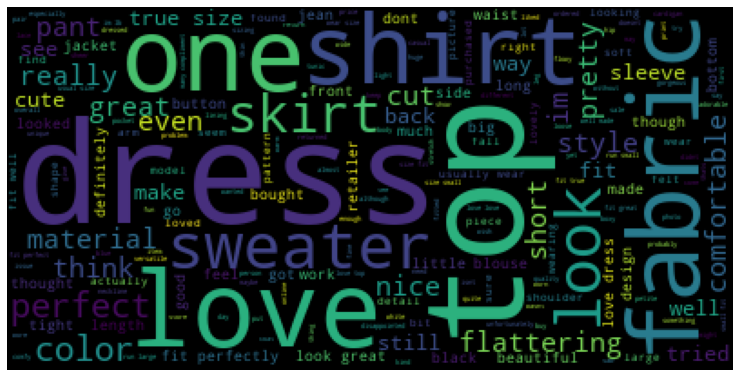

In [92]:
from wordcloud import WordCloud 

wordcloud = WordCloud(background_color="black", max_words =250).generate(all_words)

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

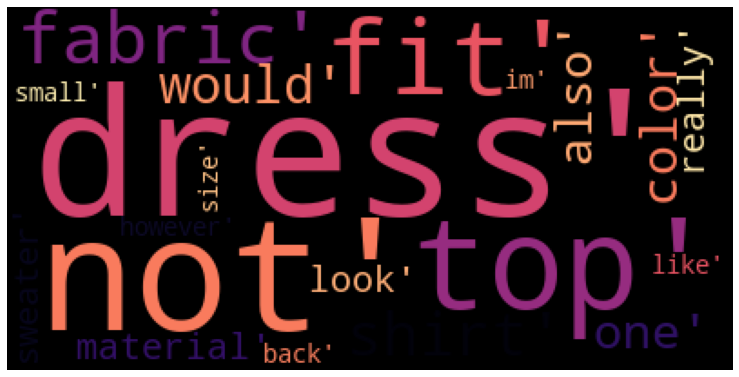

In [93]:
wordcloud = WordCloud(background_color="black", max_words =20, colormap='magma').generate(str(neg_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

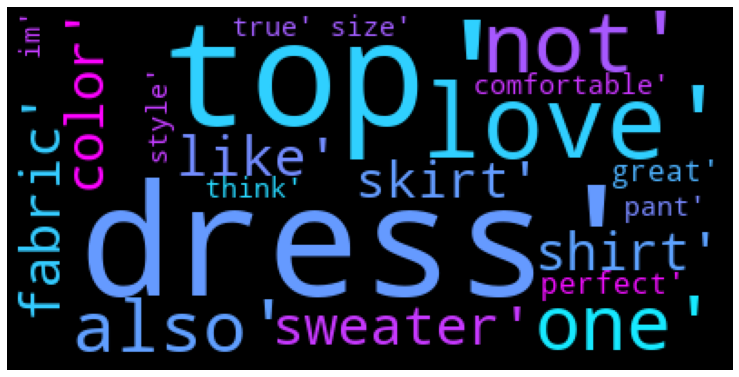

In [94]:
wordcloud = WordCloud(background_color="black", max_words =20, colormap='cool').generate(str(pos_words))

plt.figure(figsize = (13, 13))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 5. Sentiment Classification with Machine Learning, Deep Learning and BERT model

Before moving on to modeling, as data preprocessing steps you will need to perform **[vectorization](https://machinelearningmastery.com/prepare-text-data-machine-learning-scikit-learn/)** and **train-test split**. You have performed many times train test split process before.
But you will perform the vectorization for the first time.

Machine learning algorithms most often take numeric feature vectors as input. Thus, when working with text documents, you need a way to convert each document into a numeric vector. This process is known as text vectorization. Commonly used vectorization approach that you will use here is to represent each text as a vector of word counts.

At this moment, you have your review text column as a token (which has no punctuations and stopwords). You can use Scikit-learn’s CountVectorizer to convert the text collection into a matrix of token counts. You can imagine this resulting matrix as a 2-D matrix, where each row is a unique word, and each column is a review.

Train all models using TFIDF and Count vectorizer data.

**For Deep learning model, use embedding layer for all words.** 

**For BERT model, use TF tensor**

After performing data preprocessing, build your models using following classification algorithms:

- Logistic Regression,
- Naive Bayes,
- Support Vector Machine,
- Random Forest,
- Ada Boosting
- Deep Learning Model
- BERT Model

### Train - Test Split

To run machine learning algorithms we need to convert text files into numerical feature vectors. We will use bag of words model for our analysis.

First we spliting the data into train and test sets:

In [95]:
from sklearn.model_selection import train_test_split

In [96]:
X = df["review_text"]
y= df["not_recommended"]

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=101)

In [98]:
X_train.shape, X_test.shape

((18112,), (4529,))

In the next step we create a numerical feature vector for each document:

### Count Vectorization

In [99]:
from sklearn.feature_extraction.text import CountVectorizer

In [100]:
vectorizer = CountVectorizer(preprocessor=cleaning_fsa, min_df=3) # ngram_range=(1,2), max_features= 1500
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

In [101]:
X_train_count.shape, X_test_count.shape

((18112, 5197), (4529, 5197))

In [102]:
X_train_count.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [103]:
vectorizer.get_feature_names()

['ab',
 'abby',
 'abdomen',
 'ability',
 'able',
 'abo',
 'absolute',
 'absolutely',
 'abstract',
 'absurd',
 'abt',
 'abundance',
 'ac',
 'accent',
 'accented',
 'accentuate',
 'accentuated',
 'accentuates',
 'accentuating',
 'accept',
 'acceptable',
 'access',
 'accessorize',
 'accessorized',
 'accessorizing',
 'accessory',
 'accident',
 'accidental',
 'accidentally',
 'accommodate',
 'accommodates',
 'according',
 'accordingly',
 'account',
 'accurate',
 'accurately',
 'achieve',
 'across',
 'acrylic',
 'act',
 'active',
 'activewear',
 'activity',
 'actual',
 'actually',
 'ad',
 'ada',
 'add',
 'added',
 'addicted',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'adequate',
 'adequately',
 'adjust',
 'adjustable',
 'adjusted',
 'adjusting',
 'adjustment',
 'admire',
 'admiring',
 'admit',
 'admittedly',
 'adn',
 'ador',
 'adorable',
 'adore',
 'adored',
 'adult',
 'advantage',
 'advertised',
 'advice',
 'advise',
 'advised',
 'aesthetic',
 'aesthetically',
 'a

In [104]:
pd.DataFrame(X_train_count.toarray(), columns = vectorizer.get_feature_names())

,ab,abby,abdomen,ability,able,abo,absolute,absolutely,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,accessorize,accessorized,accessorizing,...,yo,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18108,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18109,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
18110,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


### TF-IDF

In [105]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [106]:
tf_idf_vectorizer = TfidfVectorizer()

X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)

In [107]:
X_train_tf_idf.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.29341255],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [108]:
pd.DataFrame(X_train_tf_idf.toarray(), columns = tf_idf_vectorizer.get_feature_names())

,aa,ab,abby,abdomen,ability,able,abo,abovetheknee,absolute,absolutely,absolutley,abstract,absurd,abt,abundance,ac,accent,accented,accentuate,accentuated,accentuates,accentuating,accept,acceptable,access,...,yoga,yoke,york,youd,youll,young,younger,youre,youthful,youve,yr,yuck,yucky,yummy,zag,zero,zig,zigzag,zip,zipped,zipper,zippered,zipping,zone,zoom
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.293413
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.262014,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.154845,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18107,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18108,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18109,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
18110,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.323914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


## Logistic Regression

### CountVectorizer

In [109]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

def eval(model, X_train, X_test):
    y_pred = model.predict(X_test)
    y_pred_train = model.predict(X_train)
    print(confusion_matrix(y_test, y_pred))
    print("Test_Set")
    print(classification_report(y_test,y_pred))
    print("Train_Set")
    print(classification_report(y_train,y_pred_train))

In [110]:
from sklearn.metrics import classification_report, accuracy_score, recall_score, precision_score, f1_score, log_loss
from sklearn.metrics import ConfusionMatrixDisplay, plot_confusion_matrix, confusion_matrix

def eval_metric_classification(model, X_train, y_train, X_test, y_test, model_name='', ml_model=True, average=None, labels=None):
    """ average (None, 'micro', 'macro', 'samples', 'weighted', 'binary')"""
    # The style parameters control properties like the color of the background and whether a grid is enabled by default.
    sns.set_style("whitegrid", {'axes.grid' : False})
    if ml_model:
      y_pred_test = model.predict(X_test)
      y_pred_train = model.predict(X_train)
    else:
      y_pred_test = model.predict(X_test) >= 0.5
      y_pred_train = model.predict(X_train) >= 0.5
    
    print("TEST REPORT")
    print(classification_report(y_test, y_pred_test))
    fig, ax = plt.subplots(2, 1, figsize=(7, 7))
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test, ax=ax[0]);
    print("\n"*1, "-*"*30)
    print("TRAIN REPORT")
    print(classification_report(y_train, y_pred_train))
    ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train, ax=ax[1]);
    plt.tight_layout()
    
    return pd.DataFrame.from_dict({
        'accuracy_test' :accuracy_score(y_test, y_pred_test),
        'f1_test'       :np.array(f1_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'recall_test'   :np.array(recall_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],
        'precision_test':np.array(precision_score(y_test, y_pred_test, average=average, labels=labels)).ravel()[0],        
        'accuracy_train' :accuracy_score(y_train, y_pred_train),
        'f1_train'       :np.array(f1_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],        
        'recall_train'   :np.array(recall_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
        'precision_train':np.array(precision_score(y_train, y_pred_train, average=average, labels=labels)).ravel()[0],
    }, orient='index', columns=[model_name]).T

In [111]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C = 0.02, max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_count,y_train)

LogisticRegression(C=0.02, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [112]:
print("LOG MODEL")
eval(log, X_train_count, X_test_count)

LOG MODEL
[[3168  541]
 [ 118  702]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.85      0.91      3709
           1       0.56      0.86      0.68       820

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14831
           1       0.60      0.89      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [113]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import make_scorer
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

scoring = {'accuracy': make_scorer(accuracy_score),
                 'precision-1': make_scorer(precision_score, pos_label=1),
                 'recall-1': make_scorer(recall_score, pos_label=1),
                 'f1-1': make_scorer(f1_score, pos_label=1)
                 }

In [114]:
model = LogisticRegression(C = 0.02, max_iter=1000,class_weight='balanced')
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,0.312121,0.008226,0.851545,0.872761,0.561331,0.599682,0.823171,0.895361,0.667491,0.718283
1,0.282849,0.006106,0.849890,0.872025,0.558522,0.597610,0.826748,0.898035,0.666667,0.717650
2,0.289965,0.007255,0.853672,0.872707,0.563380,0.599097,0.853659,0.898747,0.678788,0.718949
3,0.248632,0.006294,0.850359,0.872032,0.557576,0.598055,0.841463,0.895361,0.670717,0.717114
4,0.276206,0.006145,0.857537,0.872094,0.570565,0.598368,0.862805,0.894006,0.686893,0.716904
5,0.291730,0.008609,0.844285,0.873443,0.545635,0.600679,0.838415,0.899086,0.661058,0.720195
6,0.267153,0.006168,0.853672,0.872585,0.560461,0.599500,0.890244,0.893667,0.687868,0.717607
7,0.245747,0.005988,0.862507,0.870560,0.581109,0.594826,0.862805,0.895361,0.694479,0.714788
8,0.270980,0.005947,0.849807,0.872707,0.556452,0.599366,0.841463,0.896715,0.669903,0.718491
9,0.308120,0.009144,0.868581,0.871174,0.596567,0.596124,0.847561,0.895699,0.700252,0.715832


test_accuracy        0.854185
train_accuracy       0.872209
test_precision-1     0.565160
train_precision-1    0.598331
test_recall-1        0.848833
train_recall-1       0.896204
test_f1-1            0.678411
train_f1-1           0.717581
dtype: float64

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


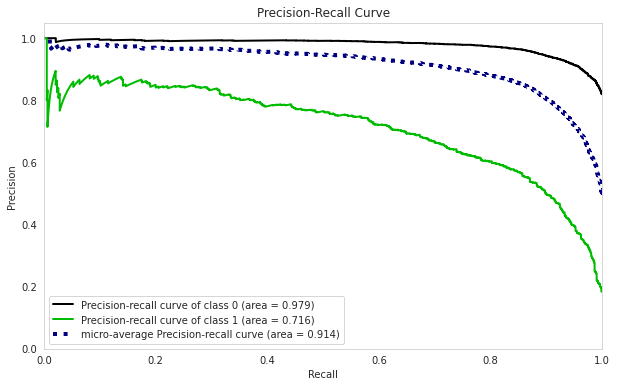

In [115]:
!pip install scikit-plot
import scikitplot as skplt

y_probas = log.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.85      0.91      3709
           1       0.56      0.86      0.68       820

    accuracy                           0.85      4529
   macro avg       0.76      0.86      0.79      4529
weighted avg       0.89      0.85      0.87      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.87      0.92     14831
           1       0.60      0.89      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.88      0.82     18112
weighted avg       0.91      0.87      0.88     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression Count,0.854493,0.680562,0.856098,0.564763,0.872184,0.717027,0.893935,0.598571


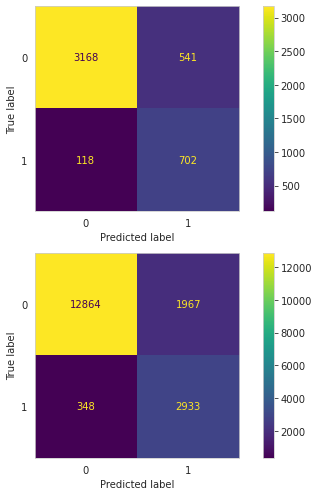

In [116]:
out_score_log = eval_metric_classification(
    log, X_train_count, y_train, X_test_count, y_test, 
    'Logistic Regression Count', average=None, labels=[1]
)
out_score_log

### Logistic Regression TF-IDF

In [117]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression(C=0.1, max_iter=1000, class_weight='balanced', random_state=101)
log.fit(X_train_tf_idf,y_train)

LogisticRegression(C=0.1, class_weight='balanced', max_iter=1000,
                   random_state=101)

In [118]:
print("LOG MODEL")
eval(log, X_train_tf_idf, X_test_tf_idf)

LOG MODEL
[[3119  590]
 [ 114  706]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3709
           1       0.54      0.86      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.57      0.89      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



In [119]:
model = LogisticRegression(C=0.1, max_iter=1000)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,0.299729,0.006871,0.834437,0.839202,0.818182,0.906863,0.109756,0.125296,0.193548,0.220173
1,0.153562,0.005538,0.833885,0.838528,0.937500,0.898010,0.091185,0.122290,0.166205,0.215265
2,0.220958,0.007007,0.837107,0.838047,0.883721,0.900256,0.115854,0.119201,0.204852,0.210526
3,0.261319,0.008891,0.831033,0.838783,0.805556,0.907268,0.088415,0.122587,0.159341,0.215990
4,0.231328,0.006708,0.842076,0.837801,0.956522,0.899225,0.134146,0.117846,0.235294,0.208383
5,0.188662,0.007903,0.836002,0.839519,0.860465,0.904077,0.112805,0.127667,0.199461,0.223739
6,0.183715,0.005224,0.834898,0.838906,0.837209,0.907731,0.109756,0.123264,0.194070,0.217054
7,0.143719,0.005567,0.836002,0.838783,0.897436,0.911392,0.106707,0.121910,0.190736,0.215054
8,0.176464,0.009976,0.829928,0.839580,0.812500,0.904306,0.079268,0.128005,0.144444,0.224266
9,0.178869,0.005562,0.835450,0.838292,0.875000,0.907455,0.106707,0.119539,0.190217,0.211251


test_accuracy        0.835082
train_accuracy       0.838744
test_precision-1     0.868409
train_precision-1    0.904658
test_recall-1        0.105460
train_recall-1       0.122761
test_f1-1            0.187817
train_f1-1           0.216170
dtype: float64

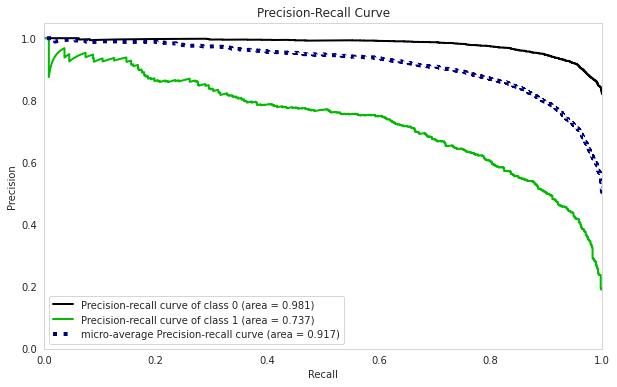

In [120]:
y_probas = log.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.84      0.90      3709
           1       0.54      0.86      0.67       820

    accuracy                           0.84      4529
   macro avg       0.75      0.85      0.78      4529
weighted avg       0.89      0.84      0.86      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.85      0.91     14831
           1       0.57      0.89      0.69      3281

    accuracy                           0.86     18112
   macro avg       0.77      0.87      0.80     18112
weighted avg       0.90      0.86      0.87     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression TF,0.844557,0.667297,0.860976,0.544753,0.857498,0.694158,0.892716,0.567856


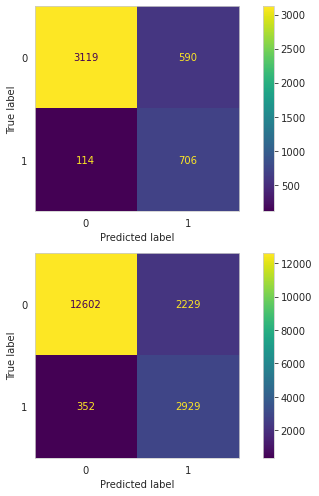

In [121]:
out_score_log_tf = eval_metric_classification(
    log, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'Logistic Regression TF', average=None, labels=[1]
)
out_score_log_tf

## Naive Bayes 

### Countvectorizer

In [122]:
from sklearn.utils import class_weight
classes_weights = class_weight.compute_sample_weight(class_weight='balanced', y=y_train)
classes_weights

array([0.61061291, 0.61061291, 0.61061291, ..., 2.76013411, 0.61061291,
       0.61061291])

In [123]:
nb = MultinomialNB(alpha=1)
nb.fit(X_train_count,y_train, sample_weight=classes_weights) 

MultinomialNB(alpha=1)

In [124]:
print("NB MODEL")
eval(nb, X_train_count, X_test_count)

NB MODEL
[[3154  555]
 [ 102  718]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3709
           1       0.56      0.88      0.69       820

    accuracy                           0.85      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.85      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.61      0.91      0.73      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



In [125]:
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_validate

scoring = {'accuracy': make_scorer(accuracy_score),
            'precision-1': make_scorer(precision_score, average=None, labels=[1]),
            'recall-1': make_scorer(recall_score, average=None, labels=[1]),
            'f1-1': make_scorer(f1_score, average=None, labels=[1])}

model = MultinomialNB(alpha=1)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,0.022555,0.008983,0.850676,0.881634,0.558022,0.616012,0.842988,0.920381,0.671524,0.738048
1,0.013707,0.008740,0.863373,0.882601,0.584375,0.617700,0.853881,0.923018,0.693878,0.740107
2,0.016140,0.017064,0.855329,0.882195,0.567623,0.617572,0.844512,0.918476,0.678922,0.738551
3,0.013697,0.008842,0.861679,0.881159,0.579162,0.615090,0.864329,0.919238,0.693578,0.737019
4,0.013191,0.009578,0.859470,0.879296,0.576166,0.610886,0.847561,0.919238,0.685996,0.733992


test_accuracy        0.858105
train_accuracy       0.881377
test_precision-1     0.573070
train_precision-1    0.615452
test_recall-1        0.850654
train_recall-1       0.920070
test_f1-1            0.684779
train_f1-1           0.737543
dtype: float64

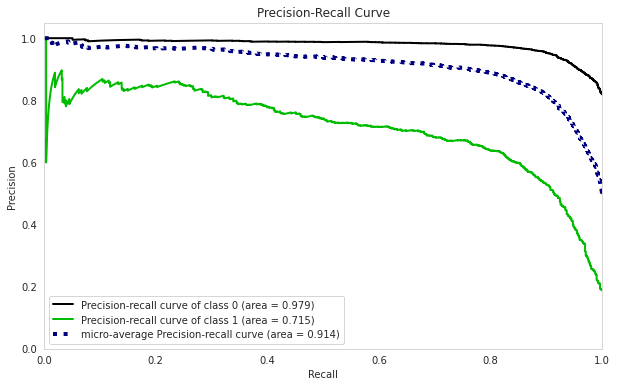

In [126]:
y_probas = nb.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.85      0.91      3709
           1       0.56      0.88      0.69       820

    accuracy                           0.85      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.90      0.85      0.87      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.87      0.92     14831
           1       0.61      0.91      0.73      3281

    accuracy                           0.88     18112
   macro avg       0.79      0.89      0.83     18112
weighted avg       0.91      0.88      0.89     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Naive Bayes Count,0.854935,0.686097,0.87561,0.564022,0.87765,0.730348,0.91466,0.607859


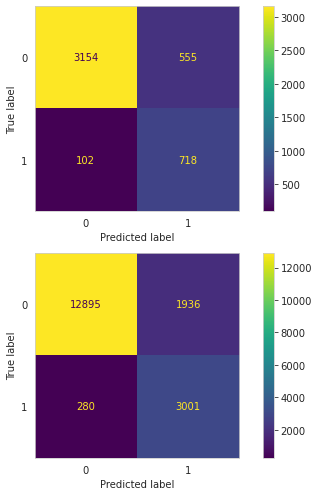

In [127]:
out_score_nb = eval_metric_classification(
    nb, X_train_count, y_train, X_test_count, y_test, 
    'Naive Bayes Count', average=None, labels=[1]
)
out_score_nb

### Naive Bayes TF-IDF

In [128]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB

nb = MultinomialNB()
nb.fit(X_train_tf_idf,y_train, sample_weight=classes_weights)

MultinomialNB()

In [129]:
print("NB MODEL")
eval(nb, X_train_tf_idf, X_test_tf_idf)

NB MODEL
[[3131  578]
 [  93  727]]
Test_Set
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.56      0.89      0.68       820

    accuracy                           0.85      4529
   macro avg       0.76      0.87      0.79      4529
weighted avg       0.90      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14831
           1       0.60      0.92      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



In [130]:
model = MultinomialNB()
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,0.019580,0.011101,0.845475,0.875276,0.548193,0.601277,0.832317,0.924822,0.661017,0.728753
1,0.020028,0.011736,0.848234,0.874233,0.551724,0.599252,0.875380,0.922425,0.676851,0.726521
2,0.038836,0.010591,0.850359,0.874916,0.556886,0.600528,0.850610,0.924484,0.673100,0.728097
3,0.022736,0.013222,0.854224,0.875100,0.564516,0.600703,0.853659,0.926177,0.679612,0.728750
4,0.038428,0.009803,0.852015,0.874854,0.559055,0.600220,0.865854,0.925838,0.679426,0.728290
5,0.022367,0.012319,0.850911,0.876388,0.556202,0.603991,0.875000,0.922452,0.680095,0.730001
6,0.018372,0.010664,0.855329,0.873689,0.564706,0.598155,0.878049,0.922452,0.687351,0.725723
7,0.033319,0.009464,0.855881,0.873075,0.566866,0.596718,0.865854,0.923468,0.685163,0.724977
8,0.018118,0.010545,0.850359,0.874241,0.556436,0.599735,0.856707,0.919404,0.674670,0.725936
9,0.031116,0.012253,0.856433,0.873382,0.568273,0.597329,0.862805,0.923806,0.685230,0.725532


test_accuracy        0.851922
train_accuracy       0.874515
test_precision-1     0.559286
train_precision-1    0.599791
test_recall-1        0.861623
train_recall-1       0.923533
test_f1-1            0.678251
train_f1-1           0.727258
dtype: float64

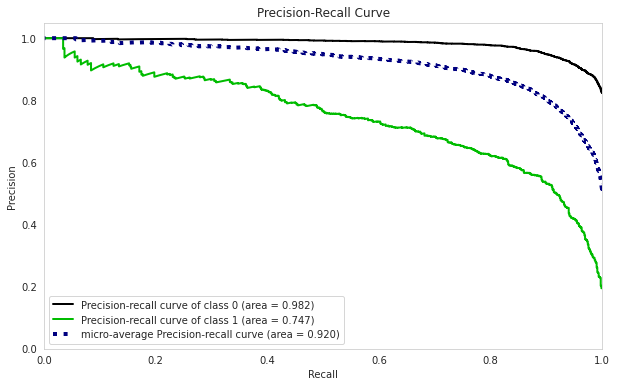

In [131]:
y_probas = nb.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.84      0.90      3709
           1       0.56      0.89      0.68       820

    accuracy                           0.85      4529
   macro avg       0.76      0.87      0.79      4529
weighted avg       0.90      0.85      0.86      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.86      0.92     14831
           1       0.60      0.92      0.72      3281

    accuracy                           0.87     18112
   macro avg       0.79      0.89      0.82     18112
weighted avg       0.91      0.87      0.88     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Naive Bayes TF,0.851844,0.684235,0.886585,0.557088,0.873233,0.724502,0.920146,0.597467


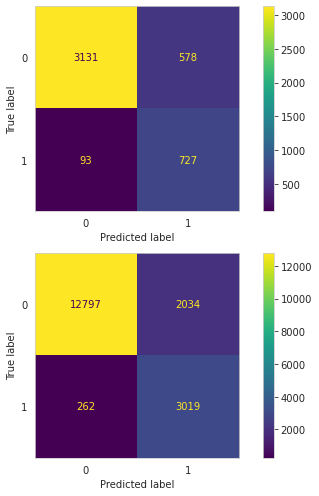

In [132]:
out_score_nb_tf = eval_metric_classification(
    nb, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'Naive Bayes TF', average=None, labels=[1]
)
out_score_nb_tf

## Support Vector Machine (SVM)

### Countvectorizer

In [133]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.01, class_weight="balanced", random_state=101)
svc.fit(X_train_count,y_train)

LinearSVC(C=0.01, class_weight='balanced', random_state=101)

In [134]:
print("SVC MODEL")
eval(svc, X_train_count, X_test_count)

SVC MODEL
[[3212  497]
 [ 130  690]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.58      0.84      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.93      0.77      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



In [135]:
model = LinearSVC(C=0.01)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,0.324445,0.008868,0.881898,0.916503,0.737500,0.853464,0.539634,0.650864,0.623239,0.738521
1,0.257830,0.009134,0.886313,0.914233,0.761702,0.845333,0.544073,0.644309,0.634752,0.731257
2,0.260568,0.009110,0.896190,0.915281,0.780000,0.850267,0.594512,0.646123,0.674740,0.734270
3,0.322259,0.010931,0.889012,0.915895,0.767932,0.851868,0.554878,0.648493,0.644248,0.736397
4,0.380258,0.018974,0.882938,0.915956,0.758929,0.850066,0.518293,0.650864,0.615942,0.737246
5,0.483768,0.008707,0.879625,0.916017,0.714844,0.851375,0.557927,0.649848,0.626712,0.737085
6,0.315387,0.009096,0.882385,0.915833,0.722008,0.853375,0.570122,0.646461,0.637138,0.735645
7,0.312064,0.024642,0.897294,0.913625,0.806034,0.841965,0.570122,0.644091,0.667857,0.729854
8,0.252694,0.008699,0.885699,0.915220,0.764192,0.851769,0.533537,0.644091,0.628366,0.733513
9,0.216666,0.010951,0.892325,0.916017,0.775934,0.852627,0.570122,0.648493,0.657293,0.736680


test_accuracy        0.887368
train_accuracy       0.915458
test_precision-1     0.758907
train_precision-1    0.850211
test_recall-1        0.555322
train_recall-1       0.647364
test_f1-1            0.641029
train_f1-1           0.735047
dtype: float64

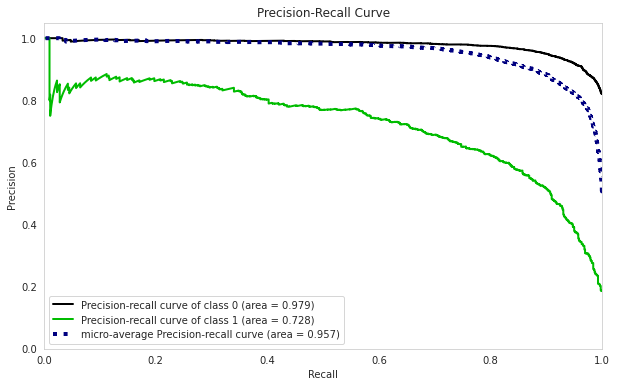

In [136]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_svc = CalibratedClassifierCV(
    # base_estimator=LinearSVC(C=0.05, class_weight='balanced', random_state=random_state),
    base_estimator=svc, 
    method='sigmoid',
    cv=4, 
)
calibrated_svc.fit(X_train_count, y_train)

y_probas = calibrated_svc.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.87      0.91      3709
           1       0.58      0.84      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.85      0.80      4529
weighted avg       0.89      0.86      0.87      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.65      0.93      0.77      3281

    accuracy                           0.90     18112
   macro avg       0.82      0.91      0.85     18112
weighted avg       0.92      0.90      0.90     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
SVM Count,0.861559,0.687593,0.841463,0.581297,0.89725,0.766235,0.929595,0.651709


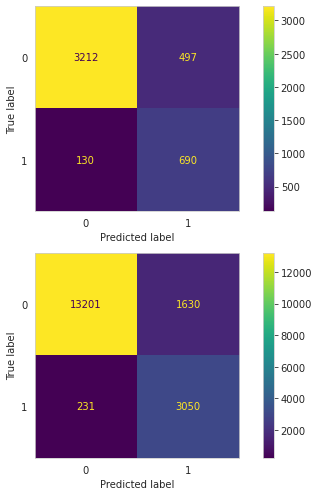

In [137]:
out_score_svc = eval_metric_classification(
    svc, X_train_count, y_train, X_test_count, y_test, 
    'SVM Count', average=None, labels=[1]
)
out_score_svc

### SVM TD-IDF

In [138]:
from sklearn.svm import LinearSVC
svc = LinearSVC(C=0.1, class_weight='balanced', random_state=101)
svc.fit(X_train_tf_idf,y_train)

LinearSVC(C=0.1, class_weight='balanced', random_state=101)

In [139]:
print("SVC MODEL")
eval(svc, X_train_tf_idf, X_test_tf_idf)

SVC MODEL
[[3189  520]
 [ 116  704]]
Test_Set
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.64      0.94      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



In [140]:
model = LinearSVC(C=0.1,class_weight='balanced', random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,0.220455,0.008420,0.863135,0.897607,0.585837,0.650422,0.832317,0.940061,0.687657,0.768869
1,0.187622,0.023231,0.863135,0.895890,0.585624,0.646441,0.841945,0.938347,0.690773,0.765511
2,0.319095,0.009055,0.867477,0.896877,0.592050,0.648876,0.862805,0.938706,0.702233,0.767336
3,0.244602,0.008631,0.863611,0.897614,0.584200,0.650211,0.856707,0.941077,0.694685,0.769060
4,0.210327,0.009110,0.871342,0.894669,0.598753,0.643788,0.878049,0.937013,0.711990,0.763205
5,0.254665,0.033514,0.865268,0.896448,0.587500,0.647402,0.859756,0.940738,0.698020,0.766980
6,0.373249,0.008804,0.855329,0.896325,0.565476,0.647443,0.868902,0.939045,0.685096,0.766446
7,0.182939,0.008554,0.872446,0.895221,0.602972,0.645071,0.865854,0.937352,0.710889,0.764219
8,0.243278,0.020787,0.860298,0.896571,0.577640,0.647979,0.850610,0.939384,0.688039,0.766934
9,0.193134,0.008688,0.878520,0.894301,0.621076,0.642559,0.844512,0.938706,0.715762,0.762901


test_accuracy        0.866056
train_accuracy       0.896152
test_precision-1     0.590113
train_precision-1    0.647019
test_recall-1        0.856146
train_recall-1       0.939043
test_f1-1            0.698514
train_f1-1           0.766146
dtype: float64

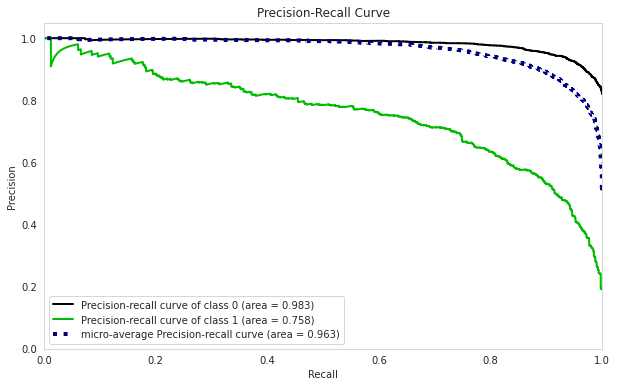

In [141]:
from sklearn.calibration import CalibratedClassifierCV

calibrated_svc = CalibratedClassifierCV(
    base_estimator=svc, 
    method='sigmoid',
    cv=4, 
)
calibrated_svc.fit(X_train_tf_idf, y_train)

y_probas = calibrated_svc.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.96      0.86      0.91      3709
           1       0.58      0.86      0.69       820

    accuracy                           0.86      4529
   macro avg       0.77      0.86      0.80      4529
weighted avg       0.89      0.86      0.87      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.89      0.93     14831
           1       0.64      0.94      0.76      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.91      0.85     18112
weighted avg       0.92      0.89      0.90     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
SVM TF,0.859572,0.688845,0.858537,0.575163,0.894821,0.763089,0.935081,0.644538


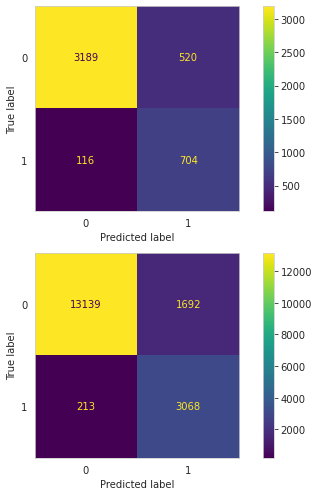

In [142]:
out_score_svc_tf = eval_metric_classification(
    svc, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'SVM TF', average=None, labels=[1]
)
out_score_svc_tf


## Random Forest

### Countvectorizer

In [143]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(100, max_depth = 40, random_state = 101, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_count, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=40, n_jobs=-1,
                       random_state=101)

In [144]:
print("RF MODEL")
eval(rf, X_train_count, X_test_count)

RF MODEL
[[3527  182]
 [ 393  427]]
Test_Set
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3709
           1       0.70      0.52      0.60       820

    accuracy                           0.87      4529
   macro avg       0.80      0.74      0.76      4529
weighted avg       0.86      0.87      0.87      4529

Train_Set
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14831
           1       0.94      0.98      0.96      3281

    accuracy                           0.98     18112
   macro avg       0.97      0.98      0.97     18112
weighted avg       0.98      0.98      0.98     18112



In [145]:
model = RandomForestClassifier(100, max_depth = 40, random_state = 101, n_jobs = -1, class_weight="balanced")
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,14.348116,0.214262,0.873620,0.986503,0.705394,0.947886,0.518293,0.979343,0.597540,0.963358
1,9.027043,0.109265,0.879139,0.985644,0.745536,0.944118,0.507599,0.978659,0.603978,0.961078
2,6.024535,0.108964,0.887355,0.985338,0.752033,0.945210,0.564024,0.975618,0.644599,0.960173
3,6.066347,0.109301,0.868029,0.986136,0.692641,0.948963,0.487805,0.975957,0.572451,0.962270
4,6.247468,0.109822,0.877416,0.984602,0.728448,0.942081,0.515244,0.974941,0.603571,0.958229
5,6.052159,0.113747,0.872998,0.985032,0.707627,0.945120,0.509146,0.973925,0.592199,0.959306
6,6.073092,0.108918,0.871342,0.985522,0.690763,0.943230,0.524390,0.979004,0.596187,0.960784
7,6.218961,0.109090,0.886803,0.985461,0.797101,0.944372,0.503049,0.977311,0.616822,0.960559
8,6.061736,0.111922,0.869133,0.986688,0.688797,0.951187,0.506098,0.976634,0.583480,0.963743
9,6.168893,0.108836,0.875207,0.986197,0.745192,0.948095,0.472561,0.977311,0.578358,0.962481


test_accuracy        0.876104
train_accuracy       0.985712
test_precision-1     0.725353
train_precision-1    0.946026
test_recall-1        0.510821
train_recall-1       0.976870
test_f1-1            0.598919
train_f1-1           0.961198
dtype: float64

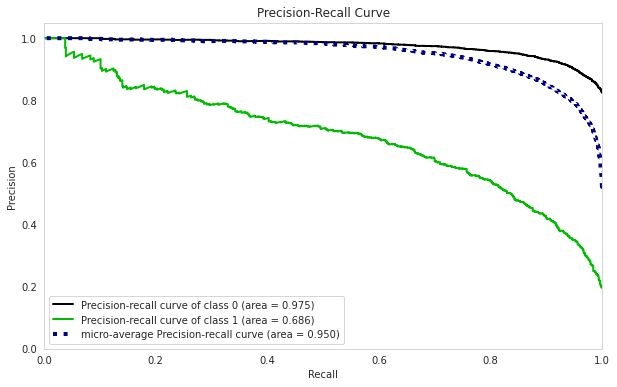

In [146]:
y_probas = rf.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.90      0.95      0.92      3709
           1       0.70      0.52      0.60       820

    accuracy                           0.87      4529
   macro avg       0.80      0.74      0.76      4529
weighted avg       0.86      0.87      0.87      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     14831
           1       0.94      0.98      0.96      3281

    accuracy                           0.98     18112
   macro avg       0.97      0.98      0.97     18112
weighted avg       0.98      0.98      0.98     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Random Forest Count,0.87304,0.597621,0.520732,0.701149,0.984541,0.958134,0.976532,0.940417


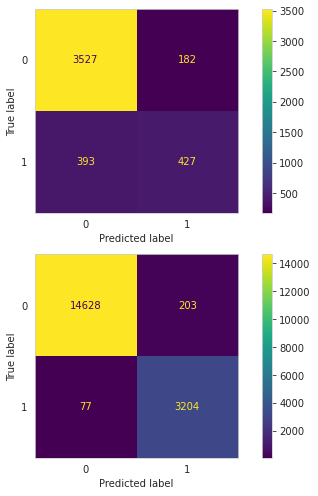

In [147]:
out_score_rf = eval_metric_classification(
    rf, X_train_count, y_train, X_test_count, y_test, 
    'Random Forest Count', average=None, labels=[1]
)
out_score_rf

### TF-IDF

In [148]:
rf = RandomForestClassifier(100, max_depth=15, random_state = 101, n_jobs = -1, class_weight="balanced")
rf.fit(X_train_tf_idf, y_train)

RandomForestClassifier(class_weight='balanced', max_depth=15, n_jobs=-1,
                       random_state=101)

In [149]:
print("RF MODEL")
eval(rf, X_train_tf_idf, X_test_tf_idf)

RF MODEL
[[3226  483]
 [ 197  623]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3709
           1       0.56      0.76      0.65       820

    accuracy                           0.85      4529
   macro avg       0.75      0.81      0.78      4529
weighted avg       0.87      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     14831
           1       0.68      0.92      0.78      3281

    accuracy                           0.91     18112
   macro avg       0.83      0.91      0.86     18112
weighted avg       0.93      0.91      0.91     18112



In [150]:
model = RandomForestClassifier(100, max_depth=40, class_weight='balanced', random_state=101, n_jobs = -1)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True)
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,12.449542,0.235017,0.873068,0.990552,0.714912,0.963871,0.496951,0.984761,0.586331,0.974204
1,12.012194,0.229281,0.871413,0.989632,0.724299,0.957580,0.471125,0.986450,0.570902,0.971800
2,11.106292,0.109036,0.881281,0.989817,0.726908,0.956436,0.551829,0.988825,0.627383,0.972361
3,6.386375,0.109354,0.870237,0.990307,0.696203,0.960158,0.503049,0.987470,0.584071,0.973623
4,6.263040,0.109606,0.874655,0.990307,0.713080,0.960461,0.515244,0.987132,0.598230,0.973614
5,6.472888,0.109327,0.863059,0.989326,0.676991,0.955126,0.466463,0.987470,0.552347,0.971029
6,12.729522,0.109023,0.880177,0.991902,0.721116,0.968138,0.551829,0.987809,0.625216,0.977875
7,6.384781,0.109244,0.872446,0.990859,0.725581,0.961792,0.475610,0.988825,0.574586,0.975121
8,7.506208,0.109401,0.870790,0.991166,0.700855,0.963378,0.500000,0.988825,0.583630,0.975936
9,6.368063,0.109183,0.874655,0.990491,0.716738,0.959593,0.509146,0.989164,0.595365,0.974154


test_accuracy        0.873178
train_accuracy       0.990436
test_precision-1     0.711668
train_precision-1    0.960653
test_recall-1        0.504125
train_recall-1       0.987673
test_f1-1            0.589806
train_f1-1           0.973972
dtype: float64

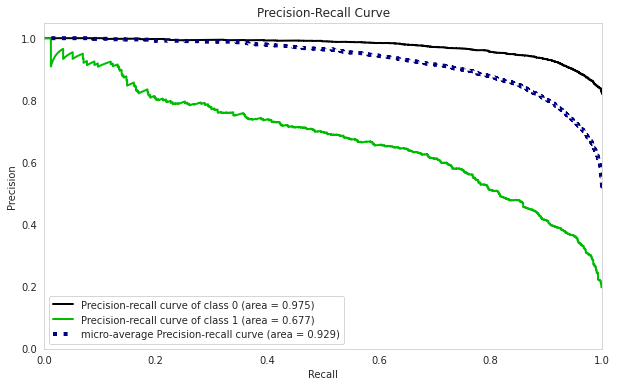

In [151]:
y_probas = rf.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.94      0.87      0.90      3709
           1       0.56      0.76      0.65       820

    accuracy                           0.85      4529
   macro avg       0.75      0.81      0.78      4529
weighted avg       0.87      0.85      0.86      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.91      0.94     14831
           1       0.68      0.92      0.78      3281

    accuracy                           0.91     18112
   macro avg       0.83      0.91      0.86     18112
weighted avg       0.93      0.91      0.91     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Random Forest TF,0.849856,0.646937,0.759756,0.563291,0.908017,0.783693,0.919842,0.682651


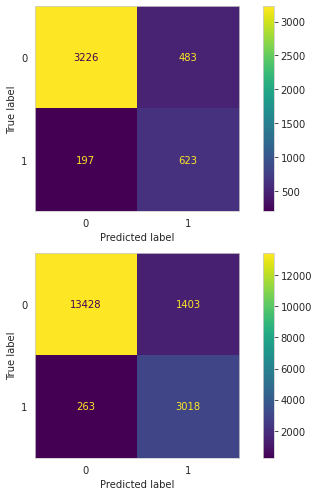

In [152]:
out_score_rf_tf = eval_metric_classification(
    rf, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'Random Forest TF', average=None, labels=[1]
)
out_score_rf_tf

## Ada Boosting

### Countvectorizer

In [153]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 101)
ada.fit(X_train_count, y_train, sample_weight=classes_weights)

AdaBoostClassifier(n_estimators=500, random_state=101)

In [154]:
print("Ada MODEL")
eval(ada, X_train_count, X_test_count)

Ada MODEL
[[3215  494]
 [ 165  655]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3709
           1       0.57      0.80      0.67       820

    accuracy                           0.85      4529
   macro avg       0.76      0.83      0.79      4529
weighted avg       0.88      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     14831
           1       0.64      0.89      0.75      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.89      0.84     18112
weighted avg       0.91      0.89      0.90     18112



In [155]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 101)
scores = cross_validate(model, X_train_count, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,18.261249,0.423044,0.851545,0.894601,0.567506,0.652131,0.756098,0.896377,0.648366,0.754991
1,17.062626,0.437410,0.857616,0.893252,0.581236,0.648311,0.772036,0.897358,0.663185,0.752771
2,18.323550,0.438524,0.858642,0.894240,0.578261,0.651020,0.810976,0.897054,0.675127,0.754486
3,17.108252,0.406159,0.861403,0.892767,0.586907,0.647708,0.792683,0.894683,0.674449,0.751422
4,17.995654,0.401642,0.865820,0.891724,0.596811,0.645731,0.798780,0.891297,0.683181,0.748897
5,16.976396,0.413097,0.850359,0.891847,0.563474,0.645833,0.771341,0.892313,0.651223,0.749325
6,17.916744,0.411656,0.852015,0.893013,0.565217,0.648708,0.792683,0.892990,0.659898,0.751496
7,16.785428,0.419490,0.868029,0.890559,0.602299,0.643014,0.798780,0.889942,0.686763,0.746591
8,18.431485,0.432543,0.858642,0.893442,0.582192,0.650123,0.777439,0.891636,0.665796,0.751963
9,16.737444,0.404304,0.869685,0.891786,0.607477,0.644471,0.792683,0.898070,0.687831,0.750424


test_accuracy        0.859376
train_accuracy       0.892723
test_precision-1     0.583138
train_precision-1    0.647705
test_recall-1        0.786350
train_recall-1       0.894172
test_f1-1            0.669582
train_f1-1           0.751237
dtype: float64

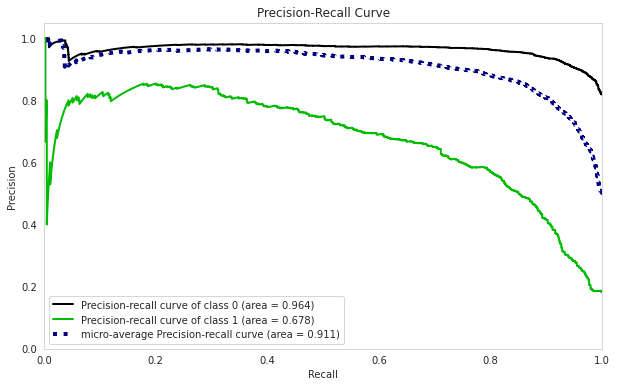

In [156]:
y_probas = ada.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.87      0.91      3709
           1       0.57      0.80      0.67       820

    accuracy                           0.85      4529
   macro avg       0.76      0.83      0.79      4529
weighted avg       0.88      0.85      0.86      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.89      0.93     14831
           1       0.64      0.89      0.75      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.89      0.84     18112
weighted avg       0.91      0.89      0.90     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Ada Boosting Count,0.854493,0.665312,0.79878,0.570061,0.889907,0.745858,0.891801,0.640964


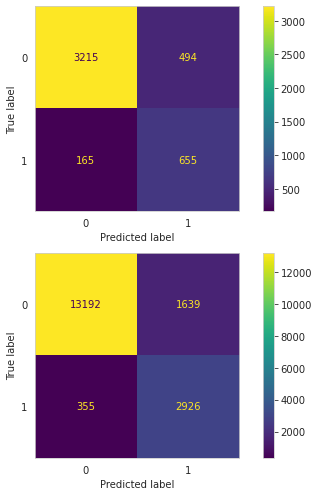

In [157]:
out_score_ada = eval_metric_classification(
    ada, X_train_count, y_train, X_test_count, y_test, 
    'Ada Boosting Count', average=None, labels=[1]
)
out_score_ada

### Ada Boost TF-IDF

In [158]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(n_estimators= 500, random_state = 101)
ada.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

AdaBoostClassifier(n_estimators=500, random_state=101)

In [159]:
print("Ada MODEL")
eval(ada, X_train_tf_idf, X_test_tf_idf)

Ada MODEL
[[3208  501]
 [ 193  627]]
Test_Set
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3709
           1       0.56      0.76      0.64       820

    accuracy                           0.85      4529
   macro avg       0.75      0.81      0.77      4529
weighted avg       0.87      0.85      0.86      4529

Train_Set
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     14831
           1       0.67      0.91      0.78      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.91      0.86     18112
weighted avg       0.92      0.90      0.91     18112



In [160]:
model = AdaBoostClassifier(n_estimators= 500, random_state = 101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring = scoring, cv = 10, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,43.673979,0.400843,0.855960,0.909080,0.580336,0.685498,0.737805,0.920420,0.649664,0.785776
1,43.814752,0.435075,0.848786,0.909816,0.565321,0.687880,0.723404,0.919038,0.634667,0.786833
2,43.796856,0.412522,0.857537,0.905650,0.581019,0.675689,0.765244,0.921436,0.660526,0.779656
3,43.347710,0.394814,0.855881,0.906754,0.583541,0.676783,0.713415,0.928886,0.641975,0.783043
4,43.507621,0.414253,0.844285,0.906386,0.553991,0.678598,0.719512,0.918049,0.625995,0.780368
5,45.088511,0.438642,0.840420,0.907061,0.542857,0.681017,0.753049,0.916018,0.630907,0.781227
6,48.793498,0.519122,0.845389,0.910190,0.552402,0.687390,0.771341,0.924822,0.643766,0.788623
7,45.267057,0.466761,0.861955,0.909147,0.594203,0.684369,0.750000,0.925161,0.663073,0.786753
8,47.334656,0.426491,0.848702,0.909453,0.567500,0.684949,0.692073,0.926177,0.623626,0.787504
9,47.597820,0.418415,0.856985,0.908963,0.580046,0.683763,0.762195,0.925499,0.658762,0.786475


test_accuracy        0.851590
train_accuracy       0.908250
test_precision-1     0.570121
train_precision-1    0.682594
test_recall-1        0.738804
train_recall-1       0.922551
test_f1-1            0.643296
train_f1-1           0.784626
dtype: float64

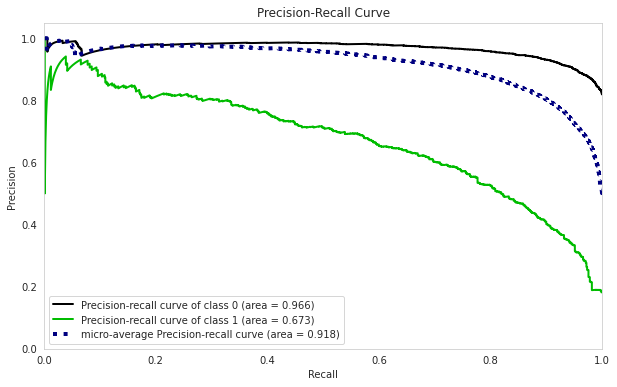

In [161]:
y_probas = ada.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.94      0.86      0.90      3709
           1       0.56      0.76      0.64       820

    accuracy                           0.85      4529
   macro avg       0.75      0.81      0.77      4529
weighted avg       0.87      0.85      0.86      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.98      0.90      0.94     14831
           1       0.67      0.91      0.78      3281

    accuracy                           0.90     18112
   macro avg       0.83      0.91      0.86     18112
weighted avg       0.92      0.90      0.91     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Ada Boosting TF,0.846765,0.643737,0.764634,0.555851,0.904207,0.775811,0.914965,0.673396


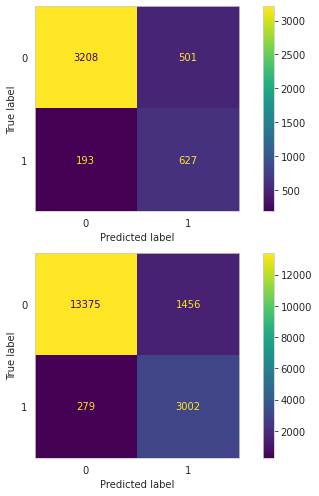

In [162]:
out_score_ada_tf = eval_metric_classification(
    ada, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'Ada Boosting TF', average=None, labels=[1]
)
out_score_ada_tf

## XG Boost

### Countvectorizer

In [163]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=101)
xgb.fit(X_train_count, y_train, sample_weight=classes_weights)

XGBClassifier(random_state=101)

In [164]:
print("XGB MODEL")
eval(xgb, X_train_count, X_test_count)

XGB MODEL
[[2982  727]
 [ 148  672]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      3709
           1       0.48      0.82      0.61       820

    accuracy                           0.81      4529
   macro avg       0.72      0.81      0.74      4529
weighted avg       0.87      0.81      0.82      4529

Train_Set
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     14831
           1       0.50      0.86      0.63      3281

    accuracy                           0.82     18112
   macro avg       0.73      0.83      0.76     18112
weighted avg       0.88      0.82      0.84     18112



In [165]:
model = XGBClassifier(random_state=101)
scores = cross_validate(model, X_train_count, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,2.792145,0.043021,0.804582,0.822210,0.476703,0.505507,0.810976,0.856762,0.600451,0.635850
1,2.676311,0.040015,0.801822,0.821727,0.472792,0.504579,0.806697,0.860899,0.596175,0.636248
2,2.542650,0.042356,0.804252,0.827881,0.475975,0.515173,0.800305,0.847238,0.596930,0.640738
3,2.595020,0.040755,0.807565,0.820428,0.481745,0.502571,0.824695,0.856381,0.608207,0.633418
4,2.552455,0.041530,0.812811,0.824362,0.489890,0.508933,0.812500,0.868190,0.611239,0.641701


test_accuracy        0.806206
train_accuracy       0.823322
test_precision-1     0.479421
train_precision-1    0.507352
test_recall-1        0.811035
train_recall-1       0.857894
test_f1-1            0.602600
train_f1-1           0.637591
dtype: float64

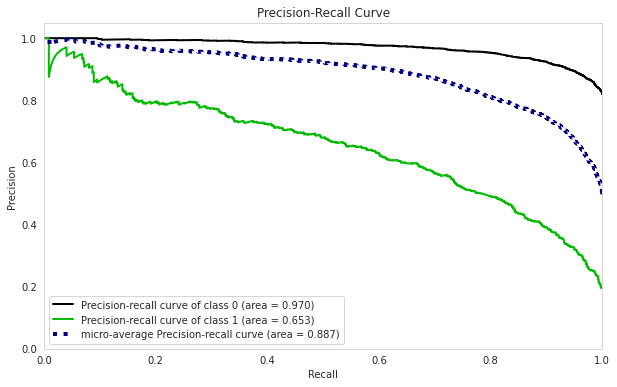

In [166]:
y_probas = xgb.predict_proba(X_test_count)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      3709
           1       0.48      0.82      0.61       820

    accuracy                           0.81      4529
   macro avg       0.72      0.81      0.74      4529
weighted avg       0.87      0.81      0.82      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.96      0.81      0.88     14831
           1       0.50      0.86      0.63      3281

    accuracy                           0.82     18112
   macro avg       0.73      0.83      0.76     18112
weighted avg       0.88      0.82      0.84     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost Count,0.806801,0.605678,0.819512,0.480343,0.82023,0.632837,0.855227,0.502237


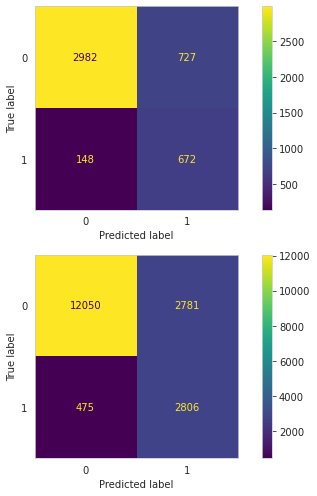

In [167]:
out_score_xgb = eval_metric_classification(
    xgb, X_train_count, y_train, X_test_count, y_test, 
    'XGBoost Count', average=None, labels=[1]
)
out_score_xgb

### XG Boost TF-IDF

In [168]:
from xgboost import XGBClassifier
xgb = XGBClassifier(random_state=101)
xgb.fit(X_train_tf_idf, y_train, sample_weight=classes_weights)

XGBClassifier(random_state=101)

In [169]:
print("XGB MODEL")
eval(xgb, X_train_tf_idf, X_test_tf_idf)

XGB MODEL
[[2954  755]
 [ 145  675]]
Test_Set
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      3709
           1       0.47      0.82      0.60       820

    accuracy                           0.80      4529
   macro avg       0.71      0.81      0.73      4529
weighted avg       0.87      0.80      0.82      4529

Train_Set
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     14831
           1       0.51      0.87      0.64      3281

    accuracy                           0.82     18112
   macro avg       0.74      0.84      0.76     18112
weighted avg       0.88      0.82      0.84     18112



In [170]:
model = XGBClassifier(random_state=101)
scores = cross_validate(model, X_train_tf_idf, y_train, scoring=scoring, cv=5, return_train_score=True, fit_params={"sample_weight":classes_weights})
df_scores = pd.DataFrame.from_dict(scores, orient='columns')
display(df_scores)
df_scores.mean()[2:]

,fit_time,score_time,test_accuracy,train_accuracy,test_precision-1,train_precision-1,test_recall-1,train_recall-1,test_f1-1,train_f1-1
0,5.524582,0.042977,0.799338,0.819932,0.468777,0.501743,0.812500,0.877333,0.594534,0.638392
1,5.861590,0.044773,0.801270,0.825523,0.472393,0.510662,0.820396,0.876143,0.599555,0.645243
2,5.760714,0.045813,0.791552,0.825466,0.456844,0.510508,0.798780,0.888381,0.581253,0.648408
3,5.668592,0.045861,0.803976,0.821946,0.476399,0.504922,0.830793,0.879238,0.605556,0.641467
4,6.006653,0.046959,0.805632,0.827053,0.478495,0.513143,0.814024,0.884952,0.602709,0.649609


test_accuracy        0.800353
train_accuracy       0.823984
test_precision-1     0.470581
train_precision-1    0.508196
test_recall-1        0.815299
train_recall-1       0.881210
test_f1-1            0.596721
train_f1-1           0.644624
dtype: float64

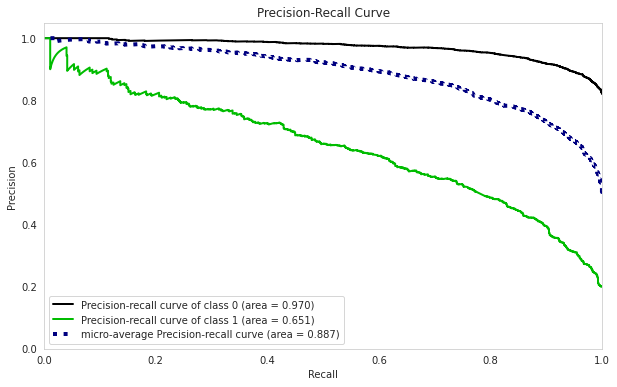

In [171]:
y_probas = xgb.predict_proba(X_test_tf_idf)
skplt.metrics.plot_precision_recall(y_test, y_probas)
plt.show()

TEST REPORT
              precision    recall  f1-score   support

           0       0.95      0.80      0.87      3709
           1       0.47      0.82      0.60       820

    accuracy                           0.80      4529
   macro avg       0.71      0.81      0.73      4529
weighted avg       0.87      0.80      0.82      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.97      0.81      0.88     14831
           1       0.51      0.87      0.64      3281

    accuracy                           0.82     18112
   macro avg       0.74      0.84      0.76     18112
weighted avg       0.88      0.82      0.84     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
XGBoost TF,0.801281,0.867803,0.796441,0.953211,0.822549,0.882142,0.811004,0.966959


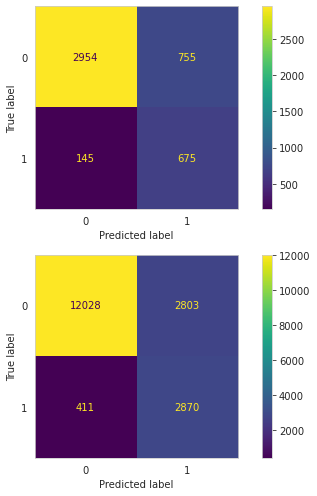

In [172]:
out_score_xgb_tf = eval_metric_classification(
    xgb, X_train_tf_idf, y_train, X_test_tf_idf, y_test, 
    'XGBoost TF', average=None, labels=[0]
)
out_score_xgb_tf

## DL modeling

In [173]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, GRU, Activation, BatchNormalization, Dropout, Dense
from tensorflow.keras.optimizers import Adam, Nadam, RMSprop, Adamax
from tensorflow.keras.callbacks import EarlyStopping

In [174]:
df = pd.DataFrame(df0[["Recommended IND", "Review Text"]].values, columns=['recommended_ind', 'review_text'])
df['not_recommended'] = df['recommended_ind'].map({0 : 1, 1: 0})
df = df.dropna().reset_index(drop=True)
df

,recommended_ind,review_text,not_recommended
0,1,Absolutely wonderful - silky and sexy and comf...,0
1,1,Love this dress! it's sooo pretty. i happene...,0
2,0,I had such high hopes for this dress and reall...,1
3,1,"I love, love, love this jumpsuit. it's fun, fl...",0
4,1,This shirt is very flattering to all due to th...,0
...,...,...,...
22636,1,I was very happy to snag this dress at such a ...,0
22637,1,"It reminds me of maternity clothes. soft, stre...",0
22638,0,"This fit well, but the top was very see throug...",1
22639,1,I bought this dress for a wedding i have this ...,0


In [175]:
X = df['review_text']
y = df['not_recommended']

### Tokenization

In [176]:
#num_words = 10000 

tokenizer = Tokenizer(num_words=None) 
# The default values of "filters" are '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n'. 
# If you also want to filters the numbers, then just "1234567890" at the end. 

In [177]:
tokenizer.fit_on_texts(X)

In [178]:
# bütün data yı kullanıyorsak token sayısı
num_words = len(tokenizer.index_word)+1

### Creating word index

In [179]:
tokenizer.word_index

{'the': 1,
 'i': 2,
 'and': 3,
 'a': 4,
 'it': 5,
 'is': 6,
 'this': 7,
 'to': 8,
 'in': 9,
 'but': 10,
 'on': 11,
 'for': 12,
 'of': 13,
 'with': 14,
 'was': 15,
 'so': 16,
 'my': 17,
 'dress': 18,
 'not': 19,
 'that': 20,
 'love': 21,
 'size': 22,
 'very': 23,
 'have': 24,
 'top': 25,
 'fit': 26,
 'are': 27,
 'like': 28,
 'be': 29,
 'as': 30,
 'me': 31,
 'wear': 32,
 "it's": 33,
 'great': 34,
 'too': 35,
 "i'm": 36,
 'or': 37,
 'am': 38,
 'just': 39,
 'you': 40,
 'would': 41,
 'they': 42,
 'up': 43,
 'at': 44,
 'fabric': 45,
 'small': 46,
 'color': 47,
 'look': 48,
 'if': 49,
 'more': 50,
 'really': 51,
 'ordered': 52,
 'little': 53,
 'perfect': 54,
 'will': 55,
 'one': 56,
 'these': 57,
 'flattering': 58,
 'well': 59,
 'an': 60,
 'soft': 61,
 'out': 62,
 'back': 63,
 'because': 64,
 'had': 65,
 'can': 66,
 '\r': 67,
 'comfortable': 68,
 'cute': 69,
 'nice': 70,
 'than': 71,
 'bought': 72,
 'beautiful': 73,
 'when': 74,
 'all': 75,
 'looks': 76,
 'bit': 77,
 'fits': 78,
 'large': 79,

In [180]:
len(tokenizer.word_index) 

14847

### Converting tokens to numeric

In [181]:
X_num_tokens = tokenizer.texts_to_sequences(X)

In [182]:
num_tokens = [len(tokens) for tokens in X_num_tokens]
num_tokens = np.array(num_tokens)

In [183]:
np.array(X_num_tokens)

array([list([253, 532, 917, 3, 662, 3, 68]),
       list([21, 7, 18, 33, 1713, 99, 2, 1322, 8, 221, 5, 9, 4, 106, 3, 36, 314, 2, 131, 1243, 2, 429, 41, 24, 52, 5, 136, 1243, 33, 95, 2, 72, 4, 95, 3, 38, 501, 2, 21, 1, 86, 11, 31, 416, 39, 4, 53, 454, 1, 392, 41, 155, 29, 4, 130, 1372, 11, 438, 439, 6, 772, 95]),
       list([2, 65, 312, 178, 1095, 12, 7, 18, 3, 51, 195, 5, 8, 102, 12, 31, 2, 1152, 52, 1, 95, 46, 17, 236, 22, 10, 2, 219, 7, 8, 29, 6689, 46, 16, 46, 9, 661, 20, 2, 118, 19, 784, 5, 43, 2, 2147, 5, 9, 95, 97, 82, 15, 39, 637, 250, 1, 25, 656, 15, 68, 3, 26, 258, 10, 1, 175, 656, 65, 4, 23, 148, 272, 475, 3, 527, 718, 489, 4601, 151, 975, 1876, 4, 1877, 142, 1589, 15, 1, 4601, 151, 475, 830, 3247, 313, 1, 469, 5, 688]),
       ...,
       list([7, 26, 59, 10, 1, 25, 15, 23, 121, 203, 7, 429, 41, 24, 561, 12, 31, 36, 314, 2, 15, 427, 8, 179, 5, 11, 9, 1, 106, 3, 124, 241, 5, 136, 14, 244, 45, 5, 41, 24, 166, 34]),
       list([2, 72, 7, 18, 12, 4, 592, 2, 24, 7, 138, 3, 33, 

In [184]:
X[105]

'The shirt is exactly as it is pictured, i have the burnt orange color and love it! i received numerous compliments both paired with jeans and tucked into a fun skirt. it fits true to size, as i normally wear a small in all retailer however it is the slightest bit tight in the shoulders. i would give this top a 5/5.'

In [185]:
print(X_num_tokens[105])

[1, 80, 6, 478, 30, 5, 6, 389, 2, 24, 1, 1905, 482, 47, 3, 21, 5, 2, 243, 2182, 210, 189, 563, 14, 92, 3, 871, 313, 4, 283, 109, 5, 78, 130, 8, 22, 30, 2, 239, 32, 4, 46, 9, 75, 103, 143, 5, 6, 1, 2868, 77, 148, 9, 1, 200, 2, 41, 324, 7, 25, 4, 265, 265]


In [186]:
tokenizer.word_index["shirt"]

80

In [187]:
tokenizer.word_index["exactly"]

478

### Maximum number of tokens for all documents¶

In [188]:
num_tokens_doc = [len(tokens) for tokens in X_num_tokens]
num_tokens_doc = np.array(num_tokens_doc)
num_tokens_doc.shape

(22641,)

In [189]:
arr = num_tokens_doc
 
print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))


# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 22641
Doc Token Count	= [ 7 62 97 ... 42 85 19]
Measures of Central Tendency
Mean 		= 60.60699615741354
Median 		= 59.0
Measures of Dispersion
Minimum 	= 2
Maximum 	= 116
Range 		= 114
Variance 	= 829.4561658852818
Standard Deviation = 28.80028065636309


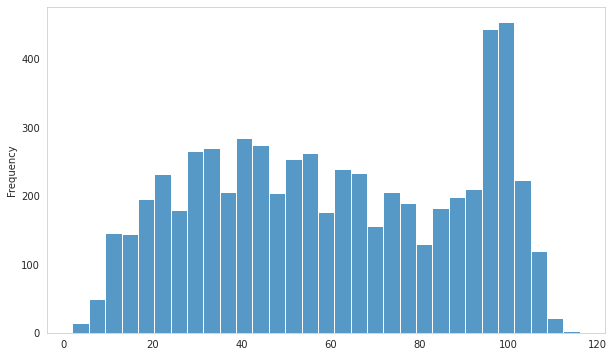

In [190]:
sns.histplot(x=num_tokens_doc, stat='frequency')

In [191]:
len(num_tokens_doc[num_tokens_doc==100])

422

In [192]:
num_tokens_doc.argmax() # listedeki en uzun yorumun indexini argmax ile bulabiliyoruz.

16263

In [193]:
X[num_tokens_doc.argmax()]

"I love maeve tops. i love the material and feel of this brand. when i saw the new tops that came out i ran to my local store to try one on. i'm usually a large in a top, once in a while an xl. they only had a large to try so i tried it in the black motif.\ni could barely get the top on. it looked like i was missing 1/2 of the top. i doubled checked the size and it was a large.\nit's a shame, the top is really cute. if you are the least bit broad or busty, go up a size or two. if you are usually a"

In [194]:
len(X_num_tokens[num_tokens_doc.argmax()])

116

In [195]:
max_tokens = 117

In [196]:
sum(num_tokens_doc < max_tokens) / len(num_tokens_doc)

1.0

In [197]:
sum(num_tokens_doc <= max_tokens)

22641

### Fixing token counts of all documents (pad_sequences)

In [198]:
X_pad = pad_sequences(X_num_tokens, maxlen=max_tokens)
X_pad.shape

(22641, 117)

In [199]:
pd.DataFrame(X_pad)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,...,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,253,532,917,3,662,3,68
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,2,21,1,86,11,31,416,39,4,53,454,1,392,41,155,29,4,130,1372,11,438,439,6,772,95
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,65,312,178,1095,...,475,3,527,718,489,4601,151,975,1876,4,1877,142,1589,15,1,4601,151,475,830,3247,313,1,469,5,688
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,2,21,21,21,7,630,33,283,1302,3,788,316,183,2,32,5,2,115,533,10,34,210
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,156,467,5,6,1,54,86,8,32,14,268,3,5,6,1190,16,5,831,59,14,251,395,21,7,80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22636,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,287,8,992,7,18,44,312,4,34,162,33,23,277,8,376,11,3,89,4,23,58,120,3,47,1156
22637,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,3,549,258,2,117,219,56,371,8,699,156,157,773,70,90,135,19,12,31,10,339,12,525,39,637
22638,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,36,314,2,15,427,8,179,5,11,9,1,106,3,124,241,5,136,14,244,45,5,41,24,166,34
22639,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,308,5,215,940,7,18,15,2812,8,31,14,4,7580,803,11,5,3,2,219,5,84,2409,129,206,185


In [200]:
np.array(X_pad[0])

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0, 253, 532, 917,   3, 662,   3,  68],
      dtype=int32)

### Train Set Split

In [201]:
from sklearn.model_selection import train_test_split

In [202]:
X_train, X_test, y_train, y_test = train_test_split(X_pad, y, test_size=0.2, stratify=y, random_state=101)  

# we have been using stratify to prevent imbalance.

### Modeling

In [203]:
num_words, max_tokens

(14848, 117)

In [204]:
tf.keras.backend.clear_session()
embedding_size = 128 

model = Sequential()
model.add(Embedding(input_dim=num_words,       # 14848
                    output_dim=embedding_size, # feature represent word embeding
                    input_length=max_tokens))  # 116
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(GRU(units=128, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.1))

model.add(GRU(units=256, return_sequences=True))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(GRU(units=128))
model.add(BatchNormalization())

model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0007)
precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)
model.compile(loss='binary_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy', 'Recall', 'Precision', 'AUC', precision_at_recall])

In [205]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 117, 128)          1900544   
                                                                 
 batch_normalization (BatchN  (None, 117, 128)         512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 117, 128)          0         
                                                                 
 gru (GRU)                   (None, 117, 128)          99072     
                                                                 
 batch_normalization_1 (Batc  (None, 117, 128)         512       
 hNormalization)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 117, 128)          0

In [206]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor="val_recall", mode="max", 
                           verbose = 1, patience = 1, restore_best_weights=True)

In [207]:
%%time
model.fit(X_train, y_train, epochs=10, batch_size=32, sample_weight= classes_weights,
         validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/10
566/566 [==============================] - 168s 278ms/step - loss: 0.4602 - accuracy: 0.7607 - recall: 0.8339 - precision: 0.4193 - auc: 0.8688 - precision_at_recall: 0.4390 - val_loss: 0.2881 - val_accuracy: 0.8724 - val_recall: 0.4354 - val_precision: 0.7564 - val_auc: 0.9158 - val_precision_at_recall: 0.5634
Epoch 2/10
566/566 [==============================] - 155s 273ms/step - loss: 0.2744 - accuracy: 0.8778 - recall: 0.9095 - precision: 0.6090 - auc: 0.9529 - precision_at_recall: 0.7140 - val_loss: 0.2578 - val_accuracy: 0.8931 - val_recall: 0.7122 - val_precision: 0.7019 - val_auc: 0.9318 - val_precision_at_recall: 0.6663
Epoch 3/10
566/566 [==============================] - 154s 273ms/step - loss: 0.1947 - accuracy: 0.9163 - recall: 0.9451 - precision: 0.6989 - auc: 0.9746 - precision_at_recall: 0.8328 - val_loss: 0.5259 - val_accuracy: 0.8081 - val_recall: 0.8976 - val_precision: 0.4839 - val_auc: 0.9145 - val_precision_at_recall: 0.5783
Epoch 4/10
566/566 [========

In [208]:
model.save('/content/drive/MyDrive/NLP/NLP_Sentiment_Analysis_Project_gru.h5')

### Model Evaluating

In [209]:
summary = pd.DataFrame(model.history.history)
summary.head()

,loss,accuracy,recall,precision,auc,precision_at_recall,val_loss,val_accuracy,val_recall,val_precision,val_auc,val_precision_at_recall
0,0.460190,0.760711,0.833892,0.419310,0.868845,0.439024,0.288075,0.872378,0.435366,0.756356,0.915820,0.563404
1,0.274395,0.877816,0.909479,0.608980,0.952923,0.714014,0.257754,0.893133,0.712195,0.701923,0.931825,0.666329
2,0.194696,0.916299,0.945139,0.698896,0.974638,0.832807,0.525879,0.808125,0.897561,0.483892,0.914484,0.578345
3,0.144670,0.940095,0.962207,0.766634,0.985414,0.892918,0.325480,0.888938,0.715854,0.684947,0.913426,0.594742


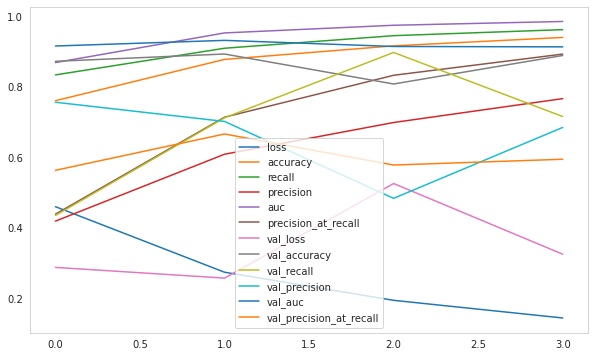

In [210]:
summary.plot();

In [211]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_pred = model.predict(X_test) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = model.predict(X_train) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
142/142 [==============================] - 14s 87ms/step
[[2924  785]
 [  84  736]]
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      3709
           1       0.48      0.90      0.63       820

    accuracy                           0.81      4529
   macro avg       0.73      0.84      0.75      4529
weighted avg       0.88      0.81      0.83      4529

-------------------------------------------------------
TRAIN
566/566 [==============================] - 47s 84ms/step
[[12861  1970]
 [    8  3273]]
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     14831
           1       0.62      1.00      0.77      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.93      0.85     18112
weighted avg       0.93      0.89      0.90     18112



In [212]:
model.evaluate(X_train, y_train)

566/566 [==============================] - 57s 101ms/step - loss: 0.2776 - accuracy: 0.8908 - recall: 0.9976 - precision: 0.6243 - auc: 0.9914 - precision_at_recall: 0.9343


[0.27762460708618164,
 0.8907906413078308,
 0.9975616931915283,
 0.6242609024047852,
 0.991383969783783,
 0.9342937469482422]

In [213]:
model.evaluate(X_test, y_test)

142/142 [==============================] - 14s 101ms/step - loss: 0.5259 - accuracy: 0.8081 - recall: 0.8976 - precision: 0.4839 - auc: 0.9145 - precision_at_recall: 0.5783


[0.5258790850639343,
 0.8081254363059998,
 0.8975609540939331,
 0.48389217257499695,
 0.9144843220710754,
 0.5783450603485107]

142/142 [==============================] - 12s 84ms/step


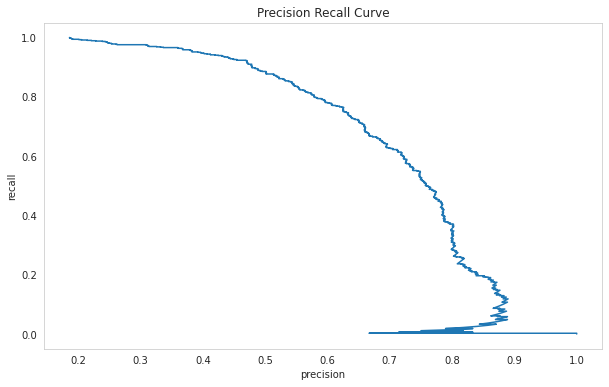

In [214]:
from sklearn.metrics import precision_recall_curve, average_precision_score

y_pred_proba = model.predict(X_test)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

# plt.plot([1, 0], [0, 1],'k--')
plt.plot(precision, recall)
plt.xlabel('precision')
plt.ylabel('recall')
plt.title('Precision Recall Curve')
plt.show()

566/566 [==============================] - 47s 84ms/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.97      0.79      0.87      3709
           1       0.48      0.90      0.63       820

    accuracy                           0.81      4529
   macro avg       0.73      0.84      0.75      4529
weighted avg       0.88      0.81      0.83      4529


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       1.00      0.87      0.93     14831
           1       0.62      1.00      0.77      3281

    accuracy                           0.89     18112
   macro avg       0.81      0.93      0.85     18112
weighted avg       0.93      0.89      0.90     18112



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
GRU Model,0.808125,0.628791,0.897561,0.483892,0.890791,0.767949,0.997562,0.624261


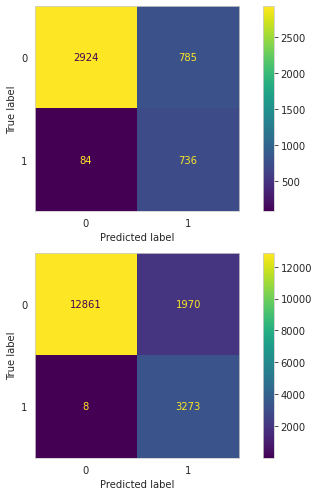

In [215]:
from tensorflow.keras.models import load_model
model_review = load_model('/content/drive/MyDrive/NLP/NLP_Sentiment_Analysis_Project_gru.h5')

out_score_gru = eval_metric_classification(
    model_review, X_train, y_train, X_test, y_test, 
    'GRU Model', ml_model=False, average=None, labels=[1]
)
out_score_gru

## BERT Modeling

In [12]:
df = pd.DataFrame(df0[["Recommended IND", "Review Text"]].values, columns=['recommended_ind', 'review_text'])
df['not_recommended'] = df['recommended_ind'].map({0 : 1, 1: 0})
df = df.dropna().reset_index(drop=True)
df

,recommended_ind,review_text,not_recommended
0,1,Absolutely wonderful - silky and sexy and comf...,0
1,1,Love this dress! it's sooo pretty. i happene...,0
2,0,I had such high hopes for this dress and reall...,1
3,1,"I love, love, love this jumpsuit. it's fun, fl...",0
4,1,This shirt is very flattering to all due to th...,0
...,...,...,...
22636,1,I was very happy to snag this dress at such a ...,0
22637,1,"It reminds me of maternity clothes. soft, stre...",0
22638,0,"This fit well, but the top was very see throug...",1
22639,1,I bought this dress for a wedding i have this ...,0


In [1]:
import tensorflow as tf
import os

# Note that the `tpu` argument is for Colab-only
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])

tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)
print("All devices: ", tf.config.list_logical_devices('TPU'))

All devices:  [LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:0', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:1', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:2', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:3', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:4', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:5', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:6', device_type='TPU'), LogicalDevice(name='/job:worker/replica:0/task:0/device:TPU:7', device_type='TPU')]


In [2]:
strategy = tf.distribute.TPUStrategy(resolver)

In [3]:
!pip install transformers -q

     |████████████████████████████████| 5.3 MB 6.0 MB/s 
     |████████████████████████████████| 163 kB 30.6 MB/s 
     |████████████████████████████████| 7.6 MB 4.2 MB/s 


In [14]:
X = df['review_text'].values
y = df['not_recommended'].values

### Train test split

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, stratify=y, random_state=101)

### Tokenization

In [16]:
from transformers import AutoTokenizer

bert_model = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(bert_model)

Downloading:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/570 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [17]:
# For every sentence...
max_token = []
for sent in X:

    # Tokenize the text and add `[CLS]` and `[SEP]` tokens.
    
    input_ids = tokenizer.encode(sent, add_special_tokens=True)
    max_token.append(len(input_ids))

print('Max sentence length: ', max(max_token))

Max sentence length:  162


In [18]:
arr = np.array(max_token)
 
print("Descriptive analysis")
print("Document Size \t=", arr.shape[0])
print("Doc Token Count\t=", arr)

# measures of central tendency
print("Measures of Central Tendency")
print("Mean \t\t=", arr.mean())
print("Median \t\t=", np.median(arr))
print("Mode \t\t=", stats.mode(arr)[0][0])

# measures of dispersion
print("Measures of Dispersion")
print("Minimum \t=", arr.min())
print("Maximum \t=", arr.max())
print("Range \t\t=", arr.ptp())
print("Variance \t=", arr.var())
print("Standard Deviation =", arr.std())

Descriptive analysis
Document Size 	= 22641
Doc Token Count	= [ 10  82 118 ...  54 102  26]
Measures of Central Tendency
Mean 		= 76.75659202332052
Median 		= 75.0
Mode 		= 122
Measures of Dispersion
Minimum 	= 4
Maximum 	= 162
Range 		= 158
Variance 	= 1251.4350770125225
Standard Deviation = 35.37562829141728


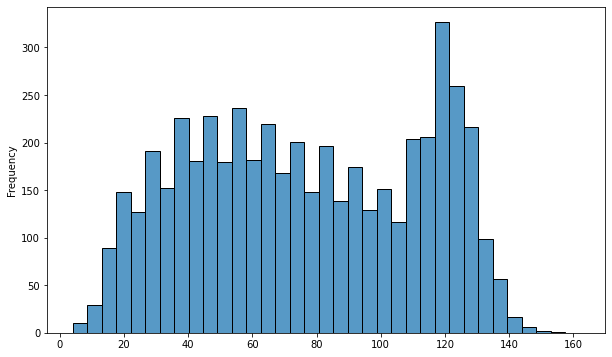

In [19]:
sns.histplot(x=max_token, stat='frequency')

In [20]:
sum(np.array(max_token) < 163) / len(max_token)

1.0

In [21]:
seq_len = 163

### Transformation text to tensor

#### Transformation Vectors to Matrices

In [22]:
def transformation(X, seq_len):
  # set array dimensions
  seq_len = seq_len
  num_samples = len(X)

  # initialize empty zero arrays
  Xids = np.zeros((num_samples, seq_len))
  Xmask = np.zeros((num_samples, seq_len))

    
  for i, phrase in enumerate(X):
      tokens = tokenizer.encode_plus(phrase, max_length=seq_len, truncation=True,
                                      padding='max_length', add_special_tokens=True) 
      
      # assign tokenized outputs to respective rows in numpy arrays
      Xids[i] = tokens['input_ids']
      Xmask[i] = tokens['attention_mask']
  return Xids, Xmask

In [23]:
Xids_train, Xmask_train = transformation(X_train, seq_len)

Xids_test, Xmask_test = transformation(X_test, seq_len)

In [24]:
print("Xids_train.shape  :", Xids_train.shape)
print("Xmask_train.shape :", Xmask_train.shape)
print("Xids_test.shape   :", Xids_test.shape)
print("Xmask_test.shape  :", Xmask_test.shape)

Xids_train.shape  : (20376, 163)
Xmask_train.shape : (20376, 163)
Xids_test.shape   : (2265, 163)
Xmask_test.shape  : (2265, 163)


In [25]:
labels_train = y_train.reshape(-1,1)
labels_train

array([[1],
       [1],
       [0],
       ...,
       [0],
       [0],
       [0]])

In [26]:
labels_test = y_test.reshape(-1,1)
labels_test

array([[0],
       [0],
       [0],
       ...,
       [1],
       [0],
       [0]])

In [27]:
labels_train.shape, labels_test.shape

((20376, 1), (2265, 1))

#### Transformation Matrix to Tensor

In [28]:
import tensorflow as tf

dataset_train = tf.data.Dataset.from_tensor_slices((Xids_train, Xmask_train, labels_train))
dataset_test = tf.data.Dataset.from_tensor_slices((Xids_test, Xmask_test, labels_test))
dataset_train, dataset_test

(<TensorSliceDataset element_spec=(TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <TensorSliceDataset element_spec=(TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(163,), dtype=tf.float64, name=None), TensorSpec(shape=(1,), dtype=tf.int64, name=None))>)

In [29]:
def map_func(Xids, Xmask, labels):
    # we convert our three-item tuple into a two-item tuple where the input item is a dictionary
    return {'input_ids': Xids, 'attention_mask': Xmask}, labels

In [30]:
# then we use the dataset map method to apply this transformation
dataset_train = dataset_train.map(map_func)
dataset_test = dataset_test.map(map_func)
dataset_train, dataset_test

(<MapDataset element_spec=({'input_ids': TensorSpec(shape=(163,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(163,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>,
 <MapDataset element_spec=({'input_ids': TensorSpec(shape=(163,), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(163,), dtype=tf.float64, name=None)}, TensorSpec(shape=(1,), dtype=tf.int64, name=None))>)

### Batch Size

In [31]:
batch_size = 32 # 16, 32

# batch_size 
# fit into a batch of 32
train_ds = dataset_train.batch(batch_size) # Gözlemlerin yeri sabit olduğundan metricler için kullanacağız. 
val_ds = dataset_test.batch(batch_size)

length = len(X_train)
train_ds2 = dataset_train.shuffle(buffer_size = length, reshuffle_each_iteration=True).batch(batch_size) 
# Buffer size boyutu train datasının boyutuyla aynı olduğunda eğitim aşamasında train datası en iyi şekilde karıştırılır.

### Creating Model

In [32]:
bert_model, seq_len

('bert-base-uncased', 163)

In [33]:
def create_model(model, seq_len):
    from transformers import TFAutoModel
    model = TFAutoModel.from_pretrained(model)
    input_ids = tf.keras.layers.Input(shape=(seq_len,), name='input_ids', dtype='int32')
    attention_mask = tf.keras.layers.Input(shape=(seq_len,), name='attention_mask', dtype='int32')
    embeddings = model.bert(input_ids=input_ids, attention_mask=attention_mask)["pooler_output"] #[1]

    x = tf.keras.layers.Dense(seq_len, activation='relu')(embeddings)
    x = tf.keras.layers.Dropout(0.2, name="dropout")(x) #0.1
    # x = tf.keras.layers.BatchNormalization()(x)
    y = tf.keras.layers.Dense(1, activation='sigmoid', name='outputs')(x)

    return tf.keras.Model(inputs=[input_ids, attention_mask], outputs=y)

In [34]:
tf.keras.backend.clear_session()

with strategy.scope():
  
  optimizer = tf.keras.optimizers.Adam(learning_rate=0.5e-5) #3e-5, 5e-5

  loss = tf.keras.losses.BinaryCrossentropy()
  recall = tf.keras.metrics.Recall()
  precision = tf.keras.metrics.Precision()
  accuracy = tf.keras.metrics.BinaryAccuracy()
  auc = tf.keras.metrics.AUC()
  precision_at_recall = tf.keras.metrics.PrecisionAtRecall(recall=0.8)

  model = create_model(bert_model, seq_len)
  model.compile(optimizer=optimizer, loss=loss, metrics=[accuracy, recall, precision, auc, precision_at_recall])

Downloading:   0%|          | 0.00/536M [00:00<?, ?B/s]

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [35]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 163)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 163)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  109482240   ['input_ids[0][0]',              
                                thPoolingAndCrossAt               'attention_mask[0][0]']         
                                tentions(last_hidde                                               
                                n_state=(None, 163,                                           

In [36]:
from sklearn.utils import class_weight

class_weights = dict(
    zip(np.unique(y_train),
        class_weight.compute_class_weight(
            class_weight = 'balanced',
            classes = np.unique(y_train), 
            y = y_train)
))
class_weights

{0: 0.6106083308360803, 1: 2.760227580601463}

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', mode="min", 
                           verbose = 1, patience = 1, restore_best_weights=True)

In [38]:
%%time
history = model.fit(train_ds2, epochs=10, class_weight = class_weights, # batch_size=32, 
                    validation_data = val_ds, callbacks=[early_stop])

Epoch 1/10
637/637 [==============================] - 237s 209ms/step - loss: 0.3487 - binary_accuracy: 0.8258 - recall: 0.8781 - precision: 0.5112 - auc: 0.9231 - precision_at_recall: 0.5823 - val_loss: 0.2493 - val_binary_accuracy: 0.8905 - val_recall: 0.9268 - val_precision: 0.6355 - val_auc: 0.9625 - val_precision_at_recall: 0.7633
Epoch 2/10
637/637 [==============================] - 79s 124ms/step - loss: 0.2218 - binary_accuracy: 0.8976 - recall: 0.9401 - precision: 0.6504 - auc: 0.9659 - precision_at_recall: 0.7818 - val_loss: 0.2585 - val_binary_accuracy: 0.8932 - val_recall: 0.9341 - val_precision: 0.6405 - val_auc: 0.9645 - val_precision_at_recall: 0.7924
Epoch 2: early stopping
CPU times: user 1min 37s, sys: 9.94 s, total: 1min 47s
Wall time: 5min 18s


In [39]:
model.save("/content/drive/MyDrive/NLP/sentiment_analysis_model_bert.h5")

### Model evaluation

In [40]:
summary = pd.DataFrame(history.history)
summary.head()

,loss,binary_accuracy,recall,precision,auc,precision_at_recall,val_loss,val_binary_accuracy,val_recall,val_precision,val_auc,val_precision_at_recall
0,0.348658,0.825825,0.878082,0.511199,0.923135,0.582333,0.249286,0.890508,0.926829,0.635451,0.962457,0.763341
1,0.221841,0.897625,0.940125,0.650422,0.965894,0.781761,0.258517,0.893157,0.934146,0.640468,0.964475,0.792363


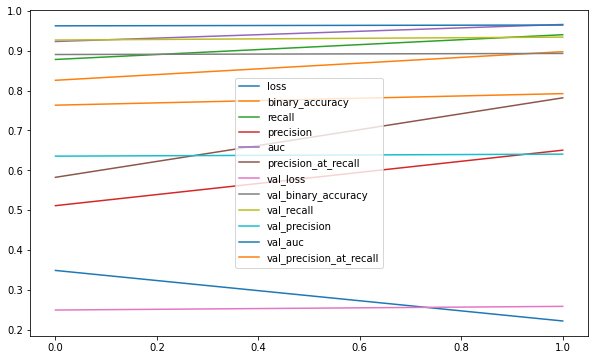

In [41]:
summary.plot();

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, roc_auc_score

print('TEST')
y_pred = model.predict(val_ds) >= 0.5
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("-------------------------------------------------------")
print('TRAIN')
y_train_pred = model.predict(train_ds) >= 0.5
print(confusion_matrix(y_train, y_train_pred))
print(classification_report(y_train, y_train_pred))

TEST
71/71 [==============================] - 25s 105ms/step
[[1637  218]
 [  30  380]]
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1855
           1       0.64      0.93      0.75       410

    accuracy                           0.89      2265
   macro avg       0.81      0.90      0.84      2265
weighted avg       0.92      0.89      0.90      2265

-------------------------------------------------------
TRAIN
637/637 [==============================] - 25s 37ms/step
[[14890  1795]
 [  152  3539]]
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     16685
           1       0.66      0.96      0.78      3691

    accuracy                           0.90     20376
   macro avg       0.83      0.93      0.86     20376
weighted avg       0.93      0.90      0.91     20376



71/71 [==============================] - 3s 31ms/step


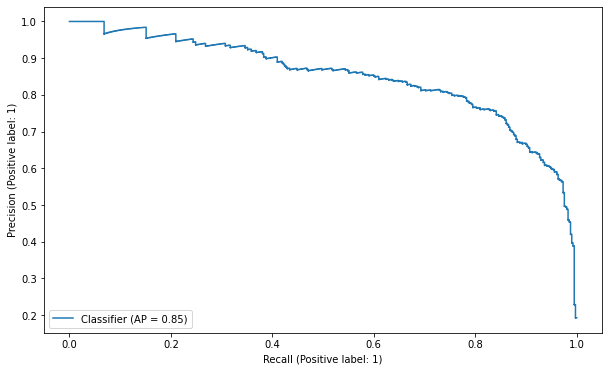

In [43]:
from sklearn.metrics import PrecisionRecallDisplay
import matplotlib.pyplot as plt

y_pred_proba = model.predict(val_ds)

PrecisionRecallDisplay.from_predictions(y_test, y_pred_proba)
plt.show();

71/71 [==============================] - 4s 31ms/step


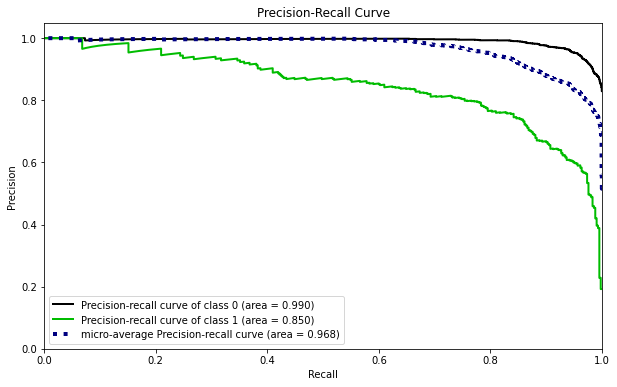

In [44]:
!pip install scikit-plot -q
import scikitplot as skplt

y_pred_proba = model.predict(val_ds)
skplt.metrics.plot_precision_recall(y_test, np.hstack([(1-y_pred_proba), y_pred_proba]))
plt.show()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


637/637 [==============================] - 786s 1s/step
TEST REPORT
              precision    recall  f1-score   support

           0       0.98      0.88      0.93      1855
           1       0.64      0.93      0.75       410

    accuracy                           0.89      2265
   macro avg       0.81      0.90      0.84      2265
weighted avg       0.92      0.89      0.90      2265


 -*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
TRAIN REPORT
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     16685
           1       0.66      0.96      0.78      3691

    accuracy                           0.90     20376
   macro avg       0.83      0.93      0.86     20376
weighted avg       0.93      0.90      0.91     20376



,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
BERT,0.890508,0.753968,0.926829,0.635452,0.904446,0.784266,0.958819,0.66348


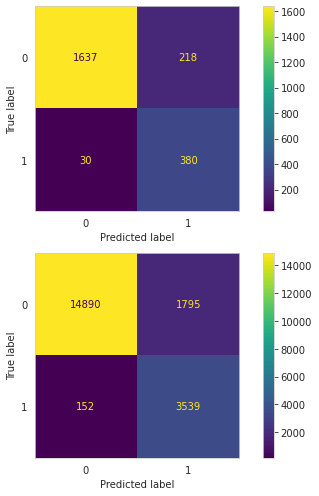

In [47]:
from tensorflow.keras.models import load_model
model_review = load_model('/content/drive/MyDrive/NLP/sentiment_analysis_model_bert.h5', custom_objects={'CustomModel': create_model(bert_model, seq_len)})

out_score_bert = eval_metric_classification(
    model_review, train_ds, y_train, val_ds, y_test, 
    'BERT', ml_model=False, average=None, labels=[1]
)
out_score_bert

### Compare Models F1 Scores, Recall Scores and Average Precision Score

In [216]:
compare = pd.concat([
    out_score_log, out_score_log_tf,
    out_score_nb, out_score_nb_tf,
    out_score_svc, out_score_svc_tf,
    out_score_rf, out_score_rf_tf,
    out_score_ada, out_score_ada_tf,
    out_score_xgb, out_score_xgb_tf,
    out_score_gru,
    out_score_bert
])
compare

,accuracy_test,f1_test,recall_test,precision_test,accuracy_train,f1_train,recall_train,precision_train
Logistic Regression Count,0.854493,0.680562,0.856098,0.564763,0.872184,0.717027,0.893935,0.598571
Logistic Regression TF,0.844557,0.667297,0.860976,0.544753,0.857498,0.694158,0.892716,0.567856
Naive Bayes Count,0.854935,0.686097,0.875610,0.564022,0.877650,0.730348,0.914660,0.607859
Naive Bayes TF,0.851844,0.684235,0.886585,0.557088,0.873233,0.724502,0.920146,0.597467
SVM Count,0.861559,0.687593,0.841463,0.581297,0.897250,0.766235,0.929595,0.651709
SVM TF,0.859572,0.688845,0.858537,0.575163,0.894821,0.763089,0.935081,0.644538
Random Forest Count,0.873040,0.597621,0.520732,0.701149,0.984541,0.958134,0.976532,0.940417
Random Forest TF,0.849856,0.646937,0.759756,0.563291,0.908017,0.783693,0.919842,0.682651
Ada Boosting Count,0.854493,0.665312,0.798780,0.570061,0.889907,0.745858,0.891801,0.640964
Ada Boosting TF,0.846765,0.643737,0.764634,0.555851,0.904207,0.775811,0.914965,0.673396


In [217]:
compare.to_csv('/content/drive/MyDrive/NLP/sentiment_analysis_compare.csv')

### Accuracy Comparison

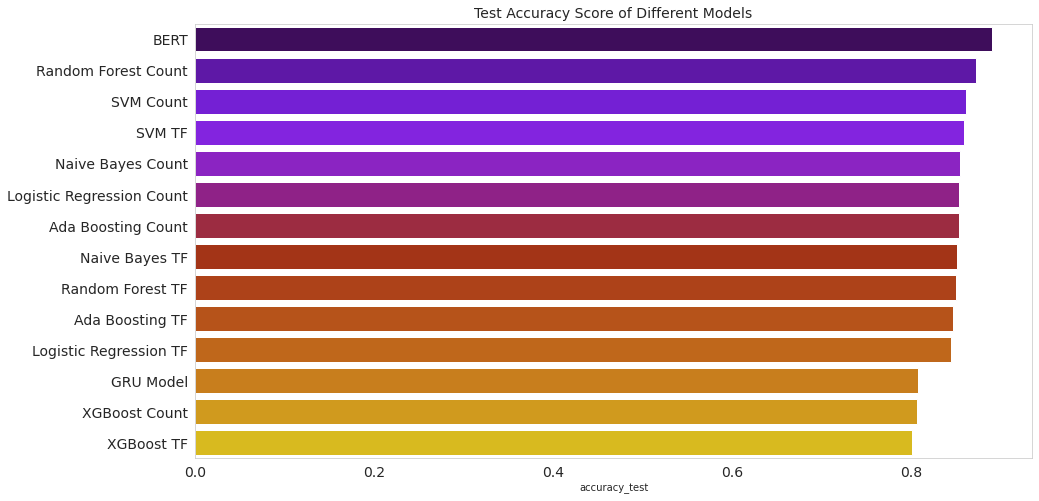

In [219]:
compare = compare.sort_values(by='accuracy_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='accuracy_test', y=compare.index, data=compare.round(3), palette="gnuplot")

plt.title("Test Accuracy Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

XG Boost and GRU Model have lower accuracy score according to other models.

### Recall Score Comparison

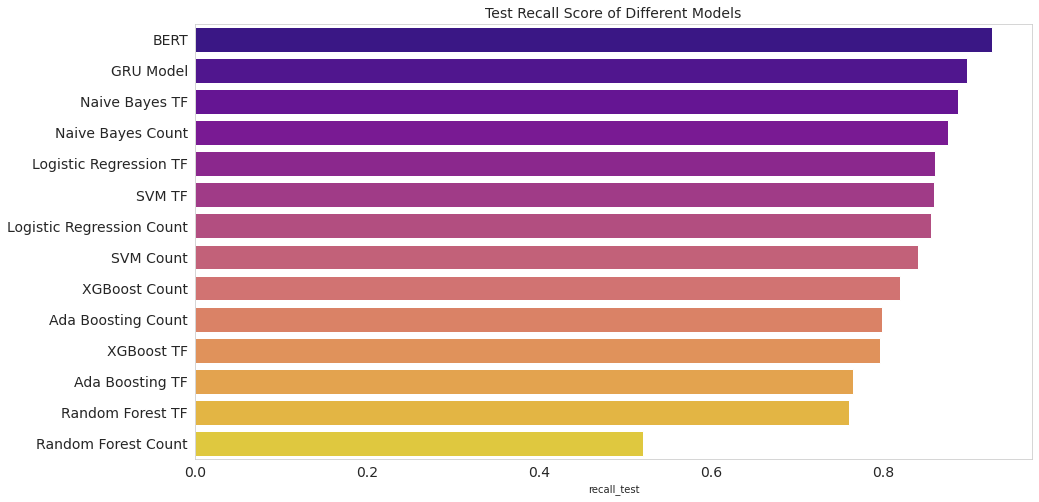

In [221]:
compare = compare.sort_values(by='recall_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='recall_test', y=compare.index, data=compare.round(3), palette="plasma")

plt.title("Test Recall Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

XRandom Forest has the lowest Recall score, and BERT has the highest Recall score.

### F1 Score Comparison

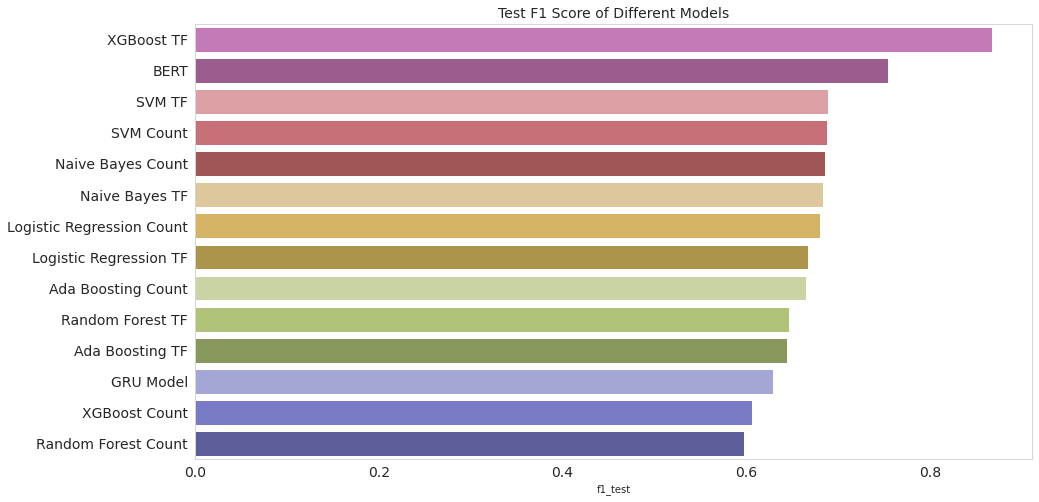

In [223]:
compare = compare.sort_values(by='f1_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='f1_test', y=compare.index, data=compare.round(3), palette="tab20b_r")

plt.title("Test F1 Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

XGBoost TF has the highest F1 score, and Random Forest has the lowest f1 score.

### Precision Score Comparison

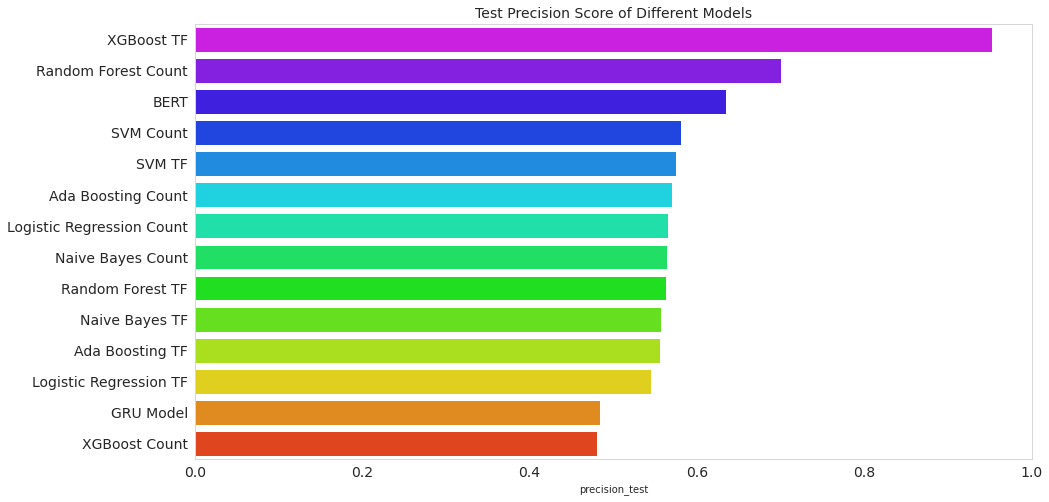

In [225]:
compare = compare.sort_values(by='precision_test', ascending=False)

plt.figure(figsize=(15,8))
ax = sns.barplot(x='precision_test', y=compare.index, data=compare.round(3), palette="gist_rainbow_r")

plt.title("Test Precision Score of Different Models", size=14)
plt.yticks(size = 14)
plt.xticks(size = 14)
plt.show()

XGBoost TF has the highest Precision score, and XG boost count has the lowest Precision score.

### Conclusion

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___